# Progetto Business Intelligence per i Servizi Finanziari

## Sommario dei dati utilizzati

### Download dei dati

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
tickers = ['AAPL', 'NVDA', 'JPM', 'BAC', 'JNJ', 'PFE']

In [7]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date'])

In [8]:
START_DATE = '2014-05-31'
END_DATE = '2024-05-31'

In [9]:
all_data = get(tickers, start=START_DATE, end=END_DATE)
all_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.859394   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.140240   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.370214   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.450134   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.393904   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

### Fusione

Prendo solo la colonna 'Adj Close' per ogni asset e li fondo in un unico dataset con le date come indici, i ticker come colonne e l'adj close come valori.

In [10]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [11]:
daily_close_px = just_closing_prices.pivot(index='Date', columns='Ticker', values='Adj Close')
daily_close_px.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-02,19.859394,12.456394,77.708138,41.671875,0.450742,19.234701
2014-06-03,20.140240,12.415585,77.928688,41.860092,0.448839,19.157009
2014-06-04,20.370214,12.415585,78.096024,41.920303,0.449315,19.189383
2014-06-05,20.450134,12.595164,78.506721,42.635555,0.451218,19.267073
2014-06-06,20.393904,12.725770,78.476303,42.891533,0.452884,19.046951


### Grafico Adjusted Close

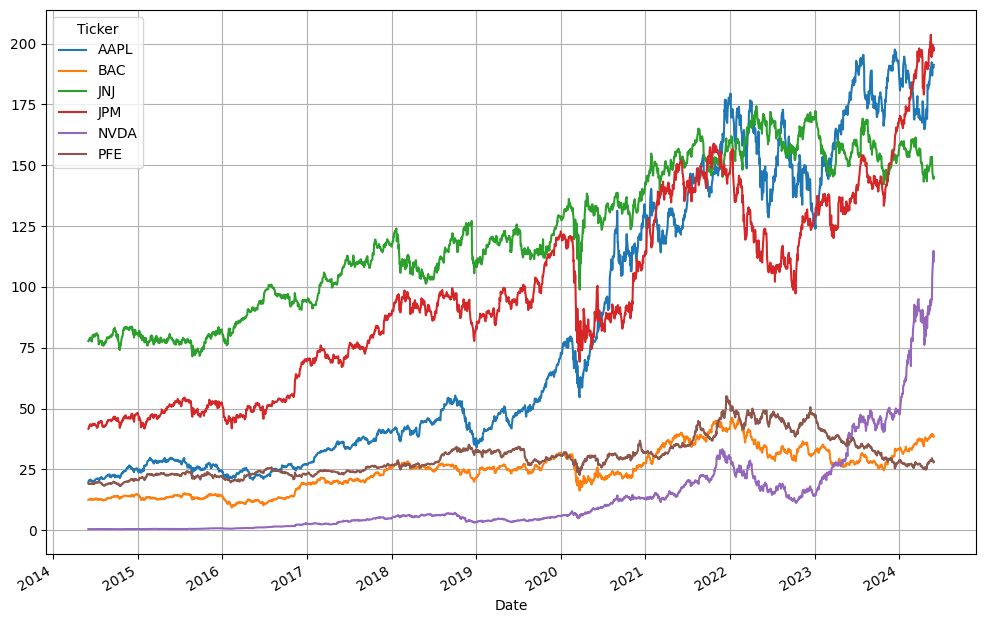

In [12]:
daily_close_px.plot(figsize=(12,8))
plt.grid()

### Grafici di prezzi e volumi per ogni asset

In [13]:
# TODO: Decidere se implementare nella relazione

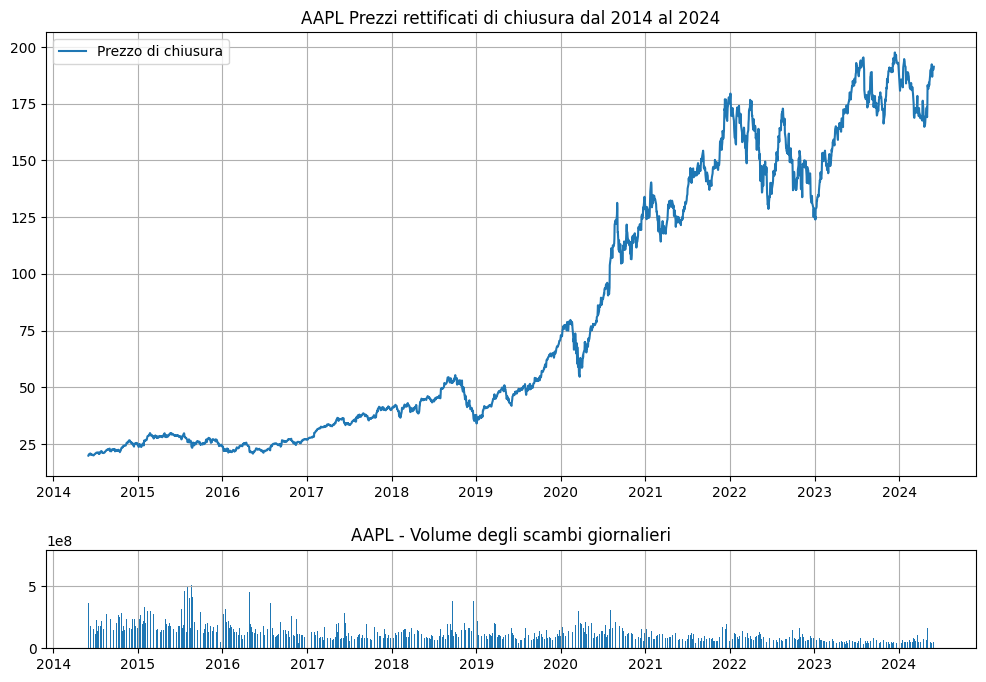

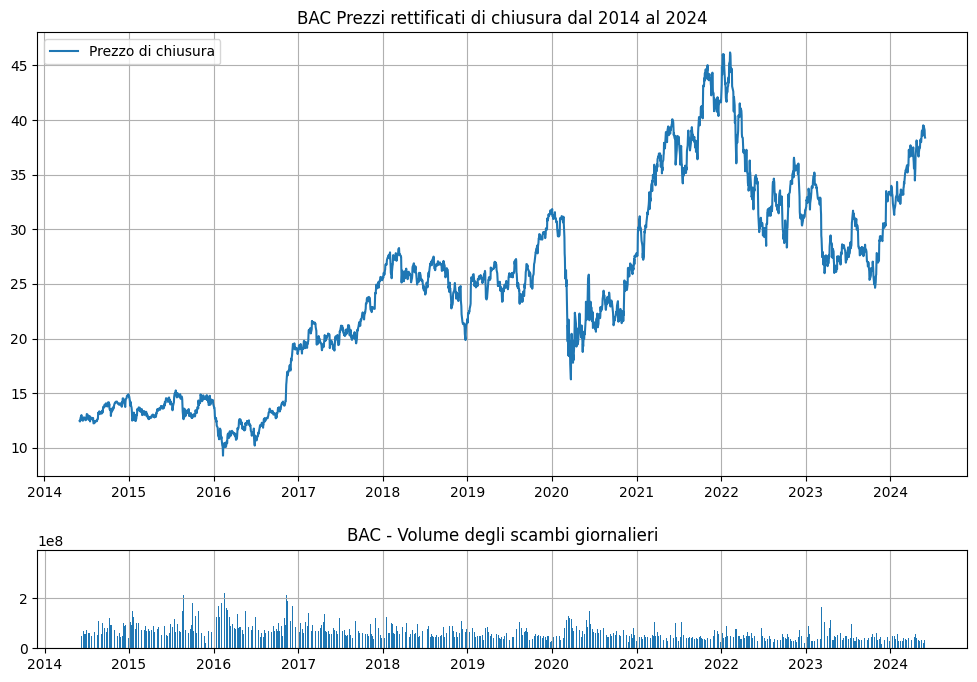

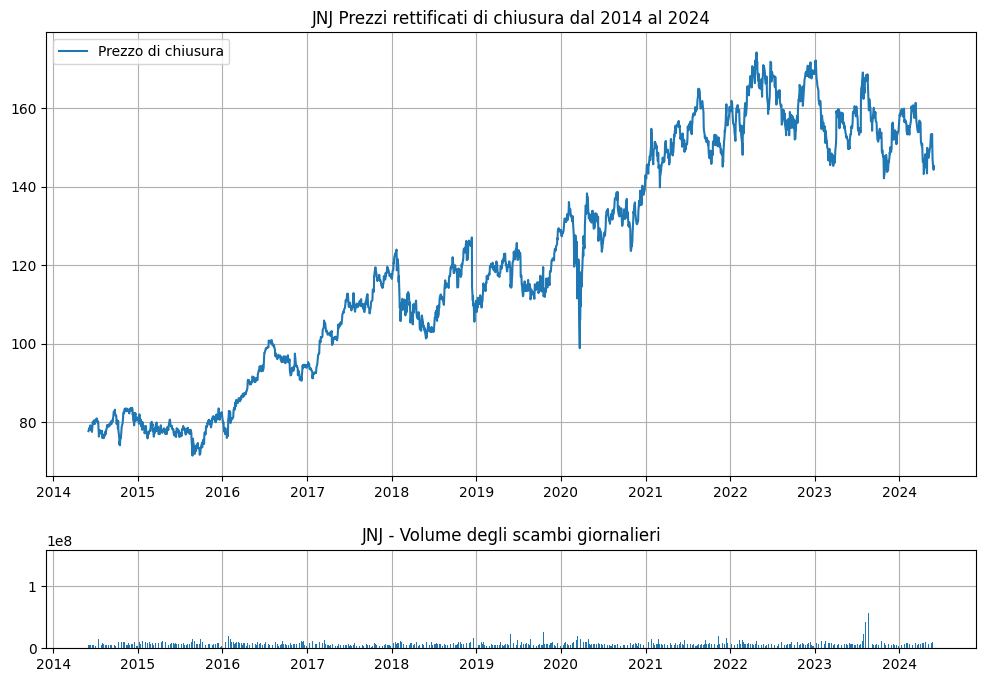

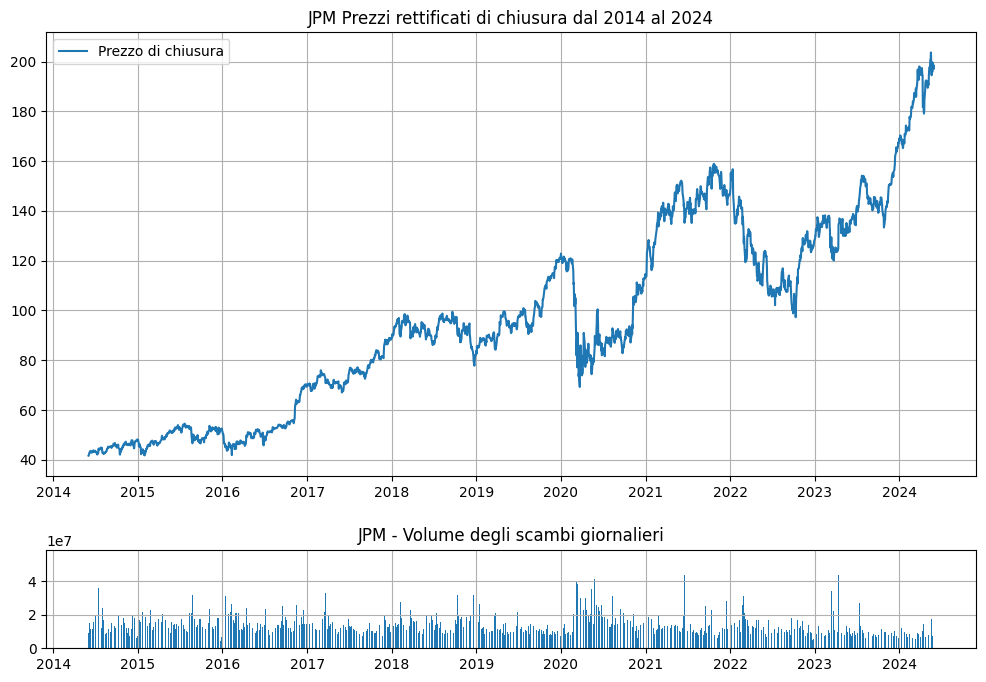

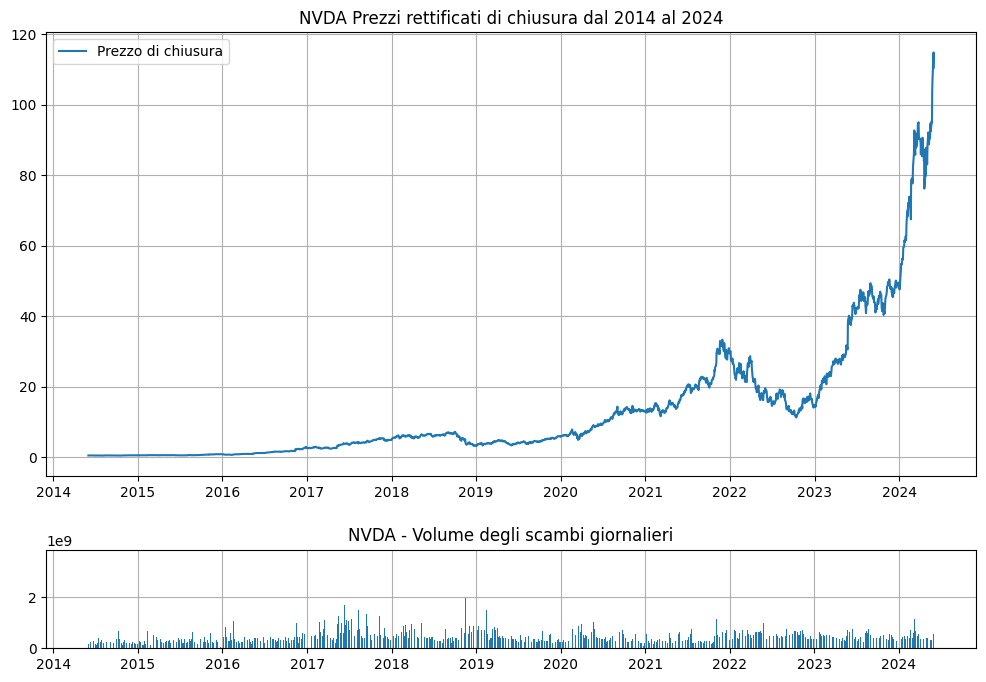

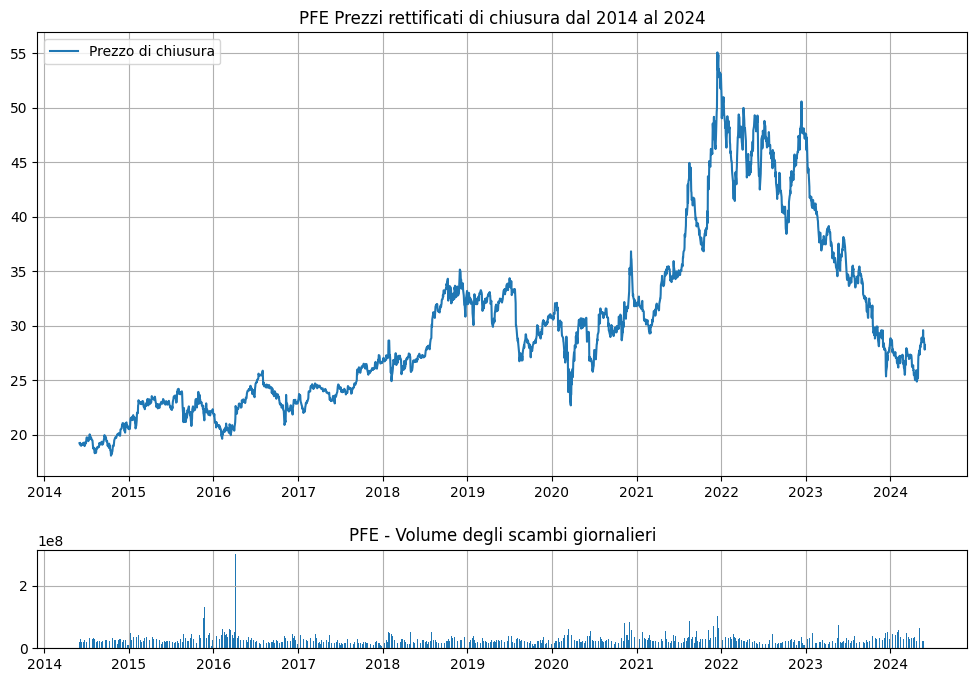

In [14]:
for ticker in daily_close_px.columns:
    top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan = 4)
    top.plot(daily_close_px.index,
            daily_close_px[ticker],
            label = 'Prezzo di chiusura')
    plt.title(f'{ticker} Prezzi rettificati di chiusura dal 2014 al 2024')
    plt.legend(loc=2)
    plt.grid()
    bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
    bottom.bar(all_data.Volume.loc[ticker].index, all_data.Volume.loc[ticker])
    plt.title(f'{ticker} - Volume degli scambi giornalieri')
    plt.gcf().set_size_inches(12,8)
    plt.subplots_adjust(hspace=0.75)
    plt.grid()
    plt.show()

## Statistiche descrittive

### Rendimento percentuale

In [15]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.dropna(inplace=True)
daily_pct_change.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014142,-0.003276,0.002838,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001438,0.001061,0.001690
2014-06-05,0.003923,0.014464,0.005259,0.017062,0.004237,0.004049
2014-06-06,-0.002750,0.010370,-0.000387,0.006004,0.003692,-0.011425
2014-06-09,0.016001,0.016036,0.000388,0.007899,0.001051,-0.002379


### Rendimento Cumulato

In [16]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014142,0.996724,1.002838,1.004517,0.995776,0.995961
2014-06-04,1.025722,0.996724,1.004992,1.005962,0.996832,0.997644
2014-06-05,1.029746,1.011140,1.010277,1.023125,1.001056,1.001683
2014-06-06,1.026915,1.021626,1.009885,1.029268,1.004752,0.990239
2014-06-09,1.043347,1.038008,1.010277,1.037398,1.005808,0.987883
...,...,...,...,...,...,...
2024-05-23,9.410156,3.125559,1.926439,4.699449,230.265600,1.491575
2024-05-24,9.566253,3.167851,1.891308,4.789897,236.188665,1.501453
2024-05-28,9.566757,3.137529,1.857978,4.761020,252.675661,1.471299


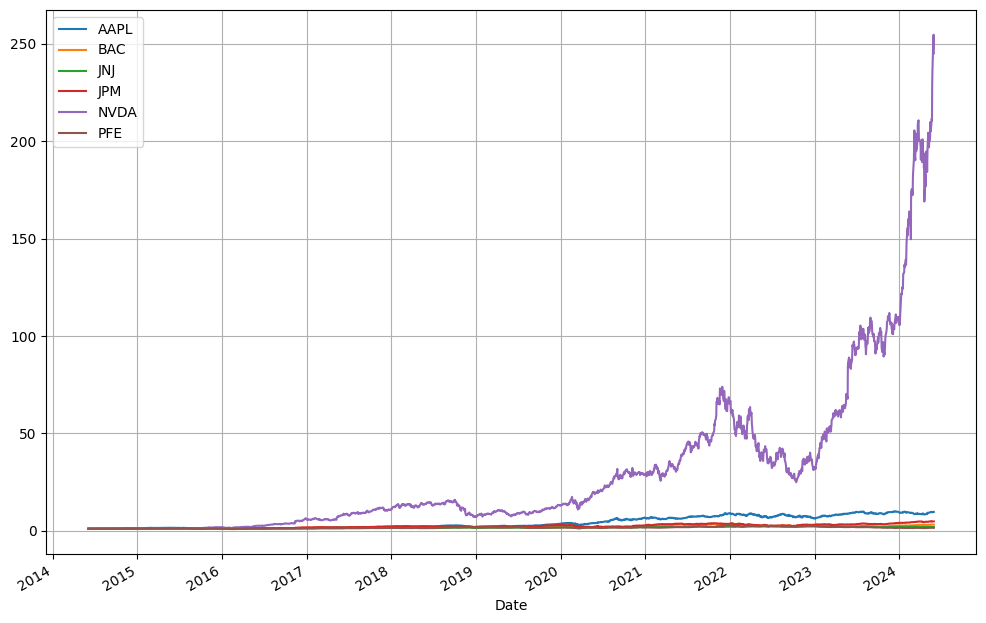

In [17]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2)
plt.grid()

In [18]:
# TODO: Magari fare un grafico per ognuno e Decidere se implementare nella relazione

### Rendimento composto annuo

In [19]:
annual_compounded_returns = (cum_daily_return.iloc[-1] ** (1 / 10)) - 1
annual_compounded_returns

Ticker
AAPL    0.254217
BAC     0.119154
JNJ     0.064569
JPM     0.168781
NVDA    0.733564
PFE     0.039002
Name: 2024-05-30 00:00:00, dtype: float64

### Rendimento Semplice Netto e Lordo e Rendimento Logaritmico

In [20]:
daily_RS_gross = daily_close_px / daily_close_px.shift(1)
daily_RS_gross.dropna(inplace=True)
daily_RS_gross.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,1.014142,0.996724,1.002838,1.004517,0.995776,0.995961
2014-06-04,1.011419,1.000000,1.002147,1.001438,1.001061,1.001690
2014-06-05,1.003923,1.014464,1.005259,1.017062,1.004237,1.004049
2014-06-06,0.997250,1.010370,0.999613,1.006004,1.003692,0.988575
2014-06-09,1.016001,1.016036,1.000388,1.007899,1.001051,0.997621


In [21]:
daily_RS_net = daily_close_px.pct_change(1)
daily_RS_net.dropna(inplace=True)
daily_RS_net.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014142,-0.003276,0.002838,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001438,0.001061,0.001690
2014-06-05,0.003923,0.014464,0.005259,0.017062,0.004237,0.004049
2014-06-06,-0.002750,0.010370,-0.000387,0.006004,0.003692,-0.011425
2014-06-09,0.016001,0.016036,0.000388,0.007899,0.001051,-0.002379


In [22]:
import numpy as np
daily_RL = np.log(daily_RS_gross)
daily_RL.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014043,-0.003282,0.002834,0.004506,-0.004233,-0.004047
2014-06-04,0.011354,0.000000,0.002145,0.001437,0.001060,0.001688
2014-06-05,0.003916,0.014360,0.005245,0.016918,0.004228,0.004040
2014-06-06,-0.002753,0.010316,-0.000388,0.005986,0.003685,-0.011491
2014-06-09,0.015875,0.015909,0.000388,0.007868,0.001050,-0.002382


Unisco tutti i rendimenti per ogni asset e faccio un grafico

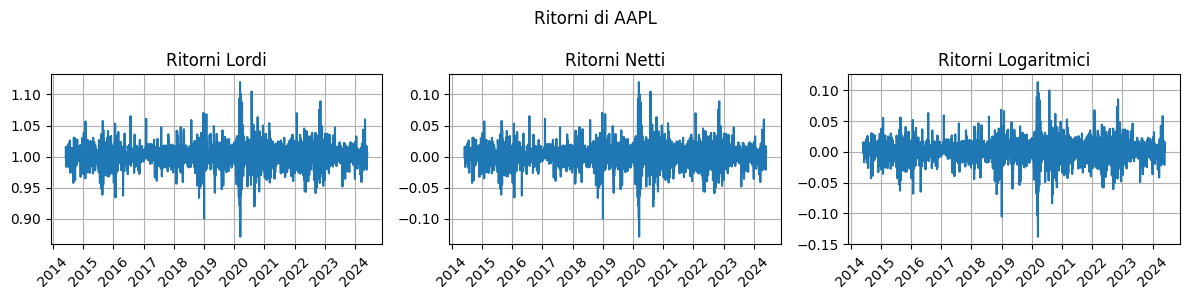

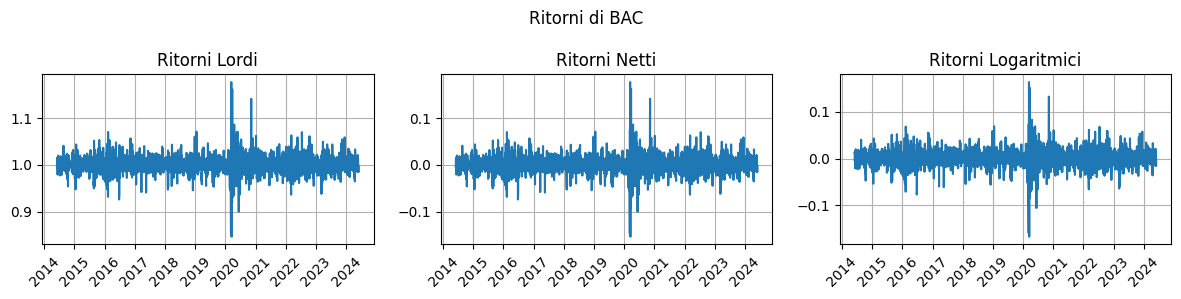

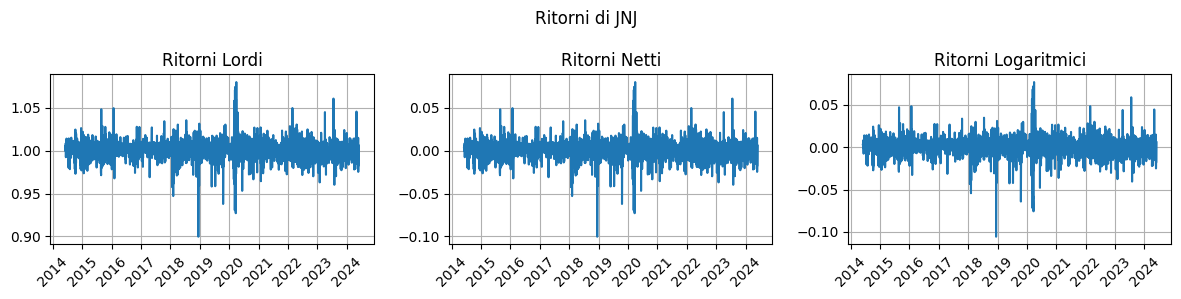

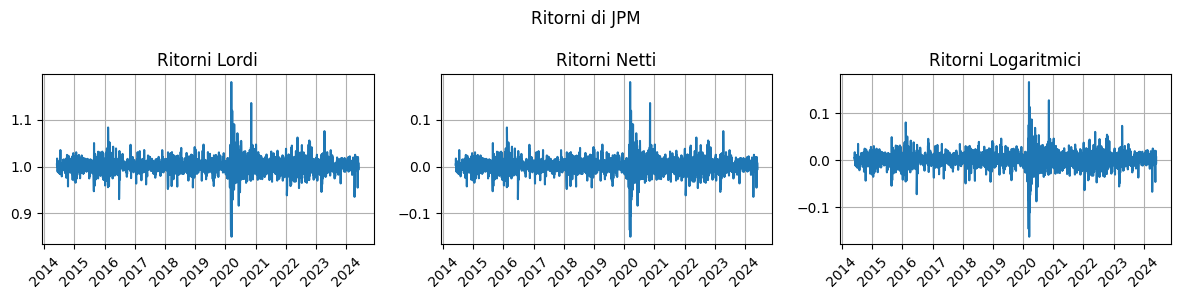

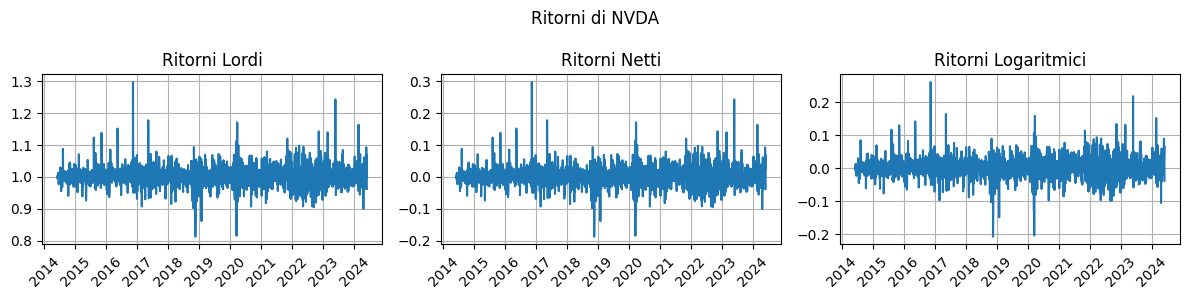

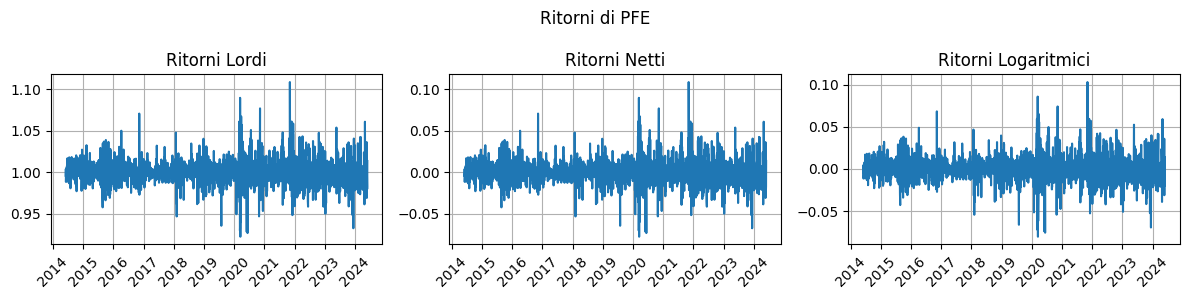

In [23]:
for ticker in daily_RS_gross.columns:
    fig, axs = plt.subplots(1,3, figsize=(12,3))
    fig.suptitle(f'Ritorni di {ticker}')
    axs[0].plot(daily_RS_gross[ticker])
    axs[0].set_title('Ritorni Lordi')
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].grid()
    axs[1].plot(daily_RS_net[ticker])
    axs[1].set_title('Ritorni Netti')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].grid()
    axs[2].plot(daily_RL[ticker])
    axs[2].set_title('Ritorni Logaritmici')
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].grid()
    plt.tight_layout()
    plt.show()

### Describe per ogni asset

In [24]:
aapl = daily_pct_change['AAPL']
aapl.describe()

count    2516.000000
mean        0.001060
std         0.017841
min        -0.128647
25%        -0.007315
50%         0.000821
75%         0.010141
max         0.119808
Name: AAPL, dtype: float64

In [25]:
nvda = daily_pct_change['NVDA']
nvda.describe()

count    2516.000000
mean        0.002629
std         0.029824
min        -0.187559
25%        -0.011623
50%         0.002392
75%         0.016956
max         0.298067
Name: NVDA, dtype: float64

In [26]:
jpm = daily_pct_change['JPM']
jpm.describe()

count    2516.000000
mean        0.000764
std         0.016972
min        -0.149649
25%        -0.007065
50%         0.000615
75%         0.008523
max         0.180125
Name: JPM, dtype: float64

In [27]:
bac = daily_pct_change['BAC']
bac.describe()

count    2516.000000
mean        0.000637
std         0.019474
min        -0.153973
25%        -0.009021
50%         0.000489
75%         0.010463
max         0.177962
Name: BAC, dtype: float64

In [28]:
jnj = daily_pct_change['JNJ']
jnj.describe()

count    2516.000000
mean        0.000313
std         0.011374
min        -0.100379
25%        -0.004920
50%         0.000293
75%         0.005978
max         0.079977
Name: JNJ, dtype: float64

In [29]:
pfe = daily_pct_change['PFE']
pfe.describe()

count    2516.000000
mean        0.000255
std         0.014380
min        -0.077346
25%        -0.006703
50%         0.000000
75%         0.007036
max         0.108552
Name: PFE, dtype: float64

### Grafici a 3 sezioni per ogni azione

Calcolo il numero corretto di colonne utilizzando la formula di Freedman-Diaconis

In [30]:
from scipy import stats

bins = (np.max(aapl, axis = 0) - np.min(aapl, axis = 0)) / (2*stats.iqr(aapl, axis = 0) / np.power(len(aapl), 1.0/3))
bins = int(bins)

bins

96

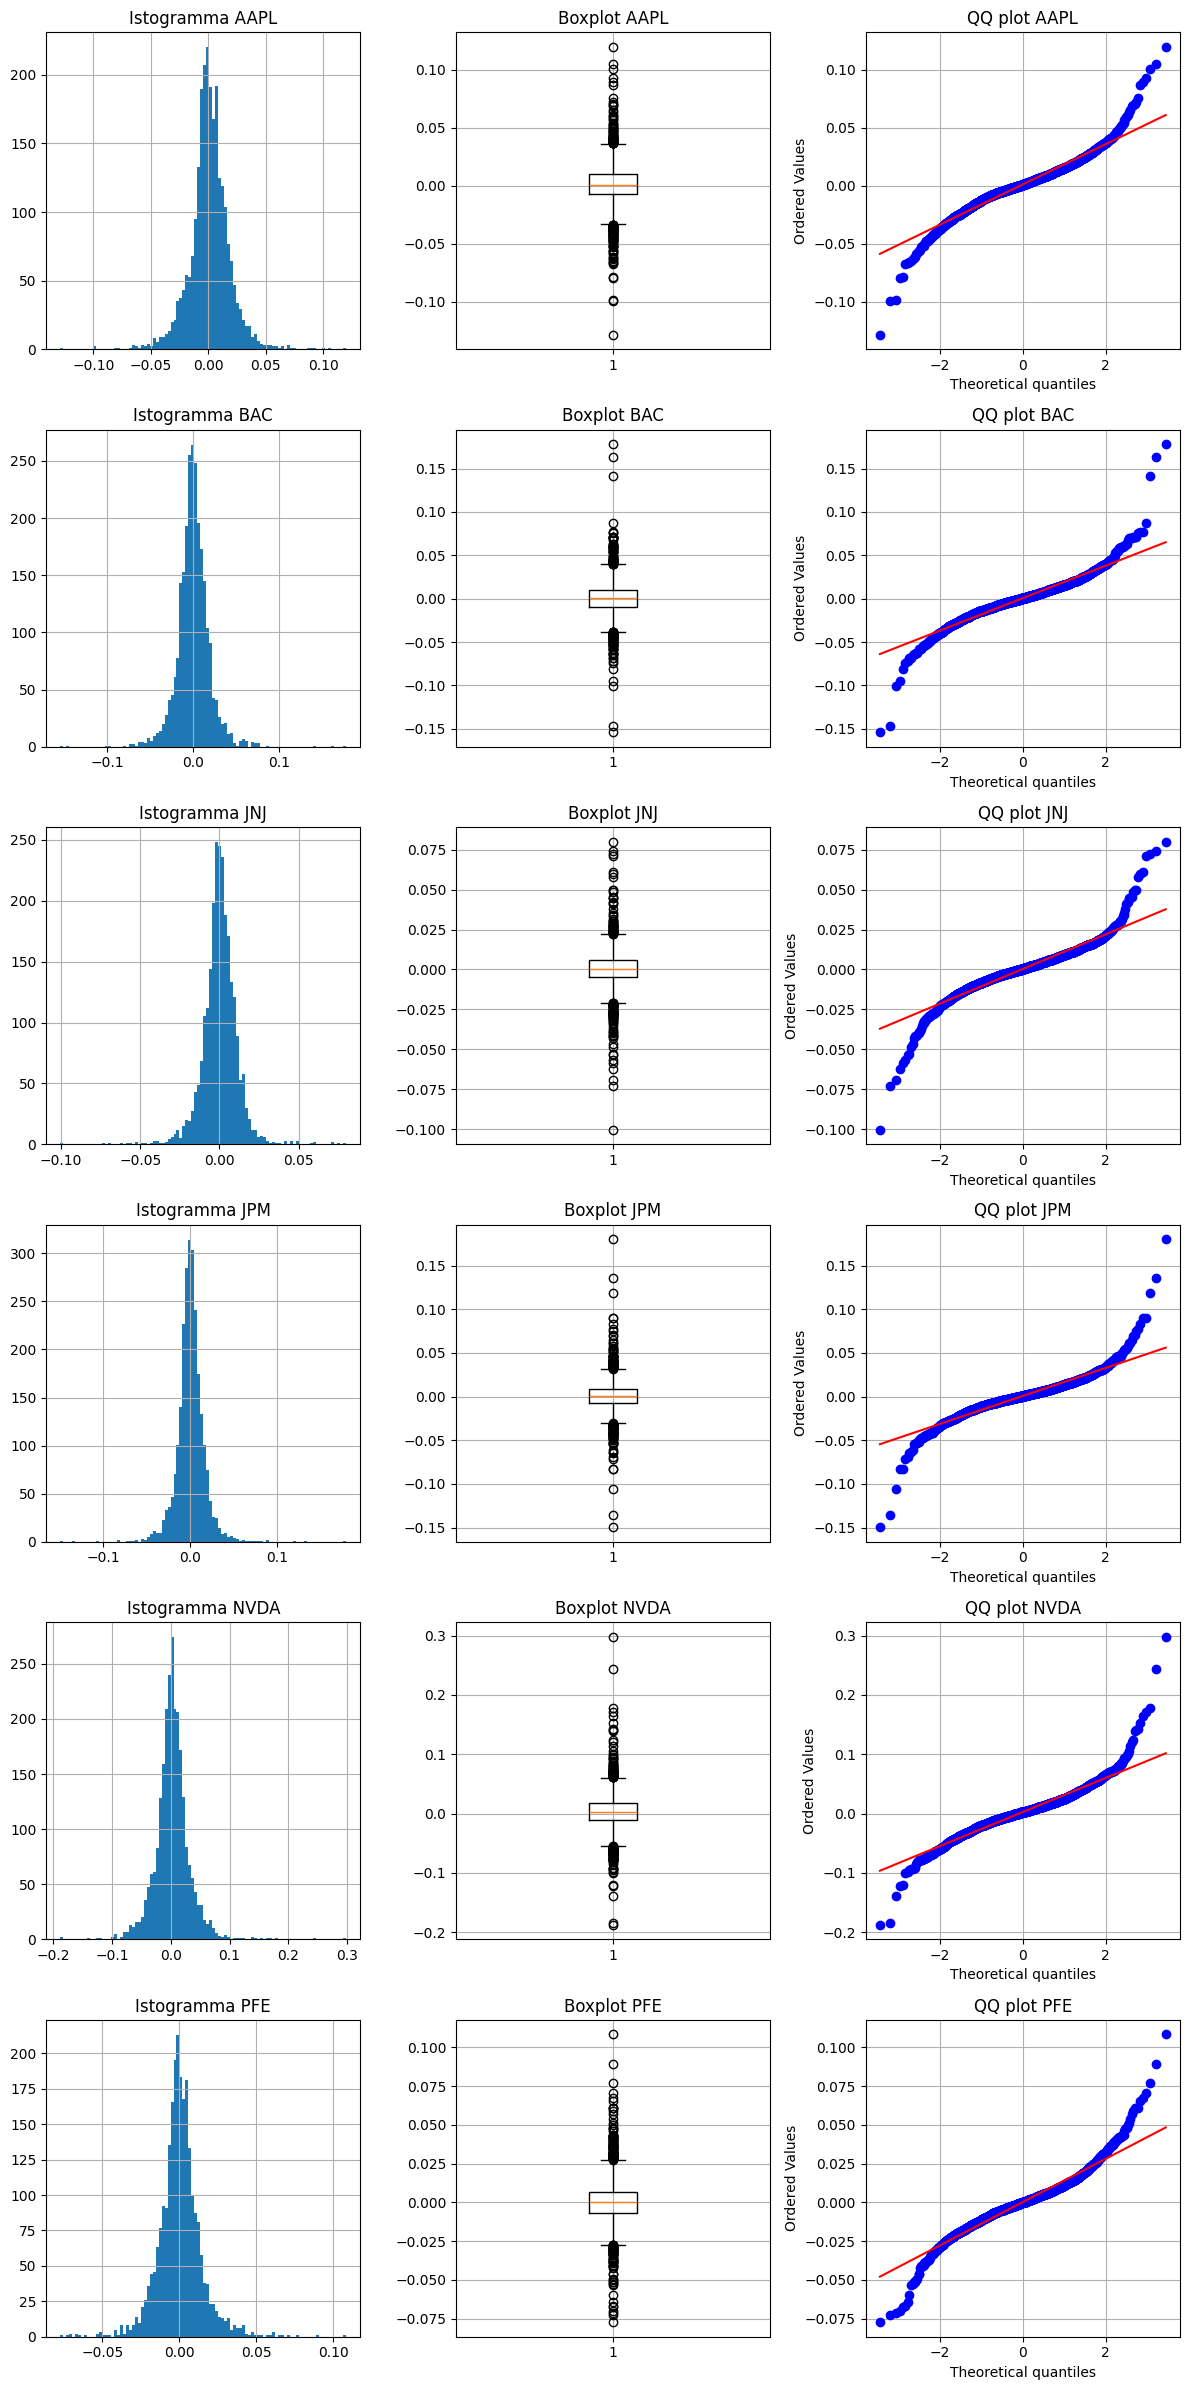

In [31]:
fig, axs = plt.subplots(6,3, figsize=(12,24))
for i, ticker in enumerate(daily_pct_change.columns):
    axs[i,0].hist(daily_pct_change[ticker], bins=bins)
    axs[i,0].set_title(f'Istogramma {ticker}')
    axs[i,0].grid()
    axs[i,1].boxplot(daily_pct_change[ticker])
    axs[i,1].set_title(f'Boxplot {ticker}')
    axs[i,1].grid()
    stats.probplot(daily_pct_change[ticker], dist='norm', plot=axs[i,2])
    axs[i,2].set_title(f'QQ plot {ticker}')
    axs[i,2].grid()
plt.tight_layout()
plt.show()

### Statistiche descrittive univariate

Calcolo media, varianza, deviazione standard, asimmetria e curtosi per ogni asset

In [32]:
from scipy.stats import skew, kurtosis

def calculate_statistics(df):
    stats = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis'])

    stats['Mean'] = df.mean()
    stats['Variance'] = df.var()
    stats['Standard Deviation'] = df.std()
    stats['Skewness'] = df.apply(skew)
    stats['Kurtosis'] = df.apply(kurtosis)

    return stats

calculate_statistics(daily_pct_change)

,Mean,Variance,Standard Deviation,Skewness,Kurtosis
Ticker,,,,,
AAPL,0.001060,0.000318,0.017841,-0.018285,5.347815
BAC,0.000637,0.000379,0.019474,0.282624,10.075068
JNJ,0.000313,0.000129,0.011374,-0.175331,9.342223
JPM,0.000764,0.000288,0.016972,0.297473,14.082771
NVDA,0.002629,0.000889,0.029824,0.689949,9.250450
PFE,0.000255,0.000207,0.014380,0.303753,5.301874


### Matrice di varianze/covarianze e Correlazione dei rendimenti

In [33]:
cov_matrix = daily_RS_net.cov()
cov_matrix

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Ticker,,,,,,
AAPL,0.000318,0.000146,0.000074,0.000131,0.000289,0.000079
BAC,0.000146,0.000379,0.000083,0.000296,0.000197,0.000098
JNJ,0.000074,0.000083,0.000129,0.000080,0.000069,0.000086
JPM,0.000131,0.000296,0.000080,0.000288,0.000175,0.000093
NVDA,0.000289,0.000197,0.000069,0.000175,0.000889,0.000080
PFE,0.000079,0.000098,0.000086,0.000093,0.000080,0.000207


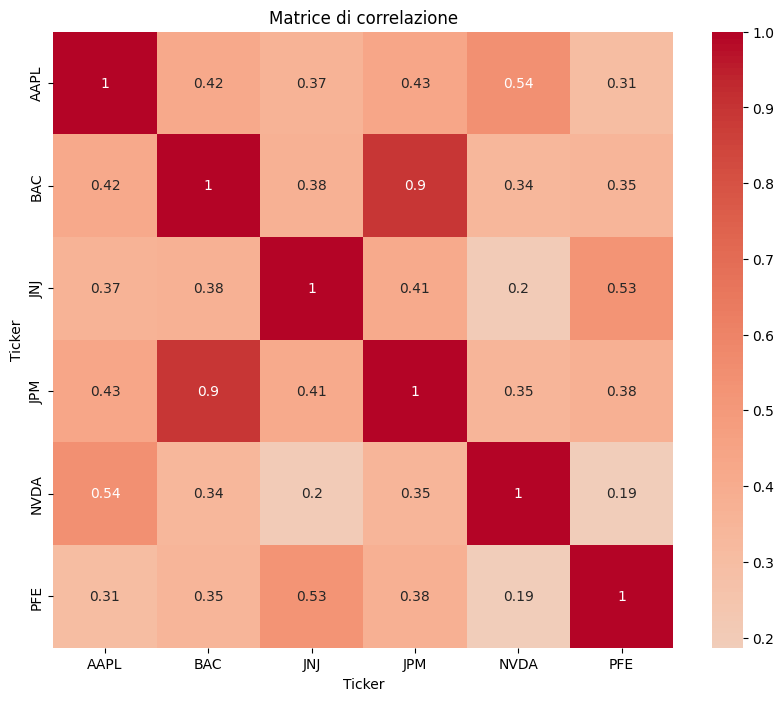

In [34]:
import seaborn as sns
corr_matrix = daily_RS_net.corr()
corr_matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di correlazione')
plt.show()

### Grafici di correlazione

#### Settore Tecnologia

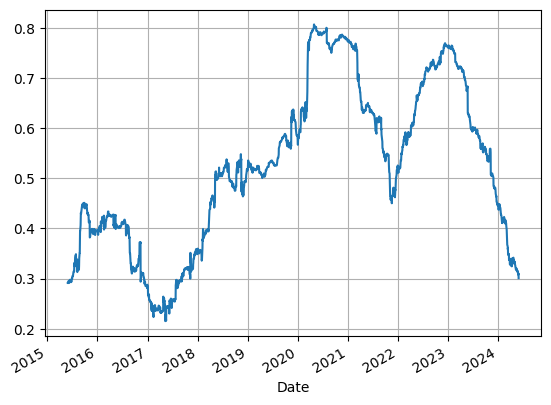

In [35]:
daily_pct_change['AAPL'].rolling(250).corr(daily_pct_change['NVDA']).plot()
plt.grid()

#### Settore Finanziario

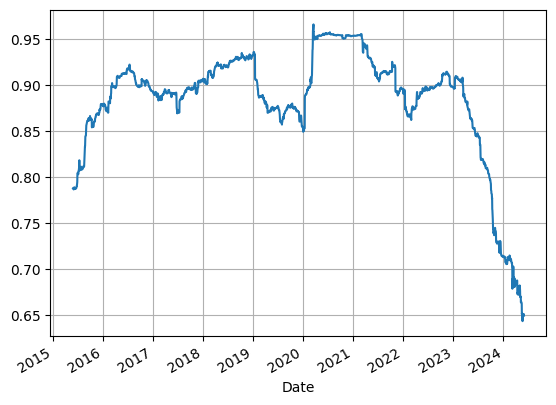

In [36]:
daily_pct_change['JPM'].rolling(250).corr(daily_pct_change['BAC']).plot()
plt.grid()

#### Settore Salute

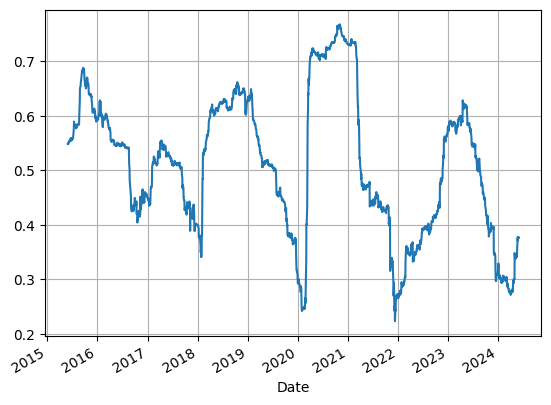

In [37]:
daily_pct_change['JNJ'].rolling(250).corr(daily_pct_change['PFE']).plot()
plt.grid()

### Grafici di Dispersione

In [38]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

#### Settore Tecnologia

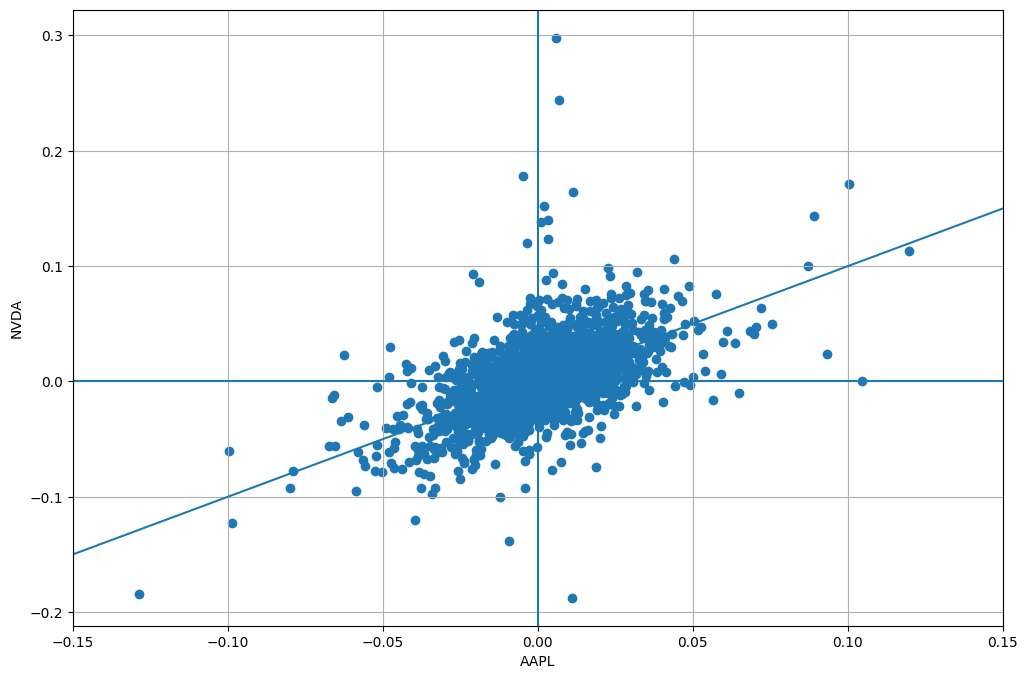

In [39]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'AAPL', 'NVDA', xlim=limits)
plt.grid()

#### Settore Finanziario

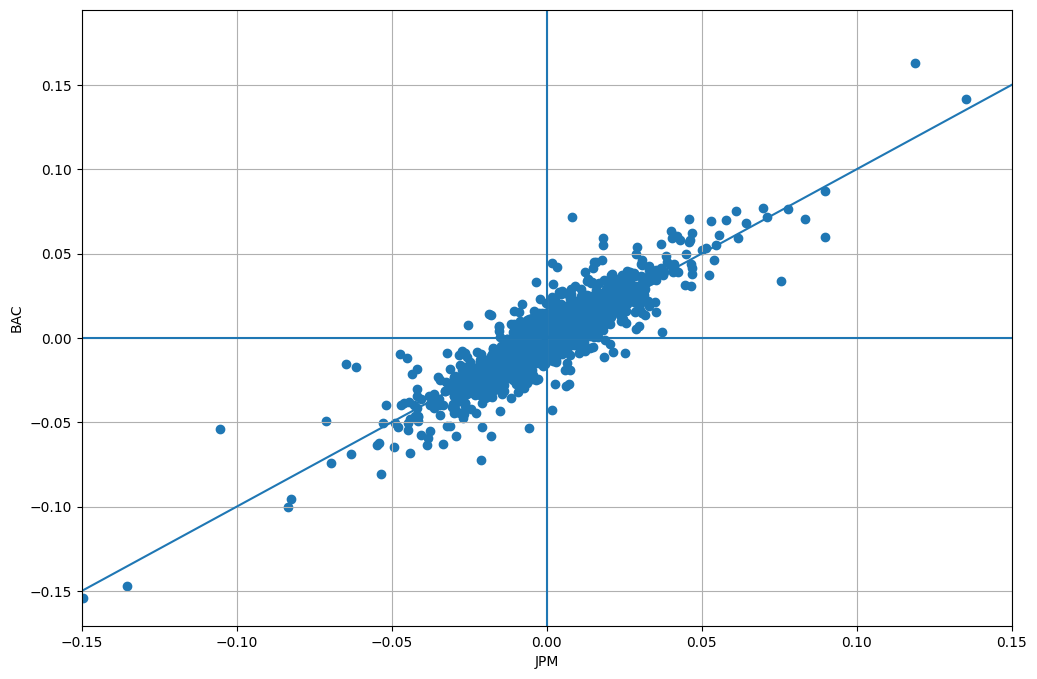

In [40]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JPM', 'BAC', xlim=limits)
plt.grid()

#### Settore Salute

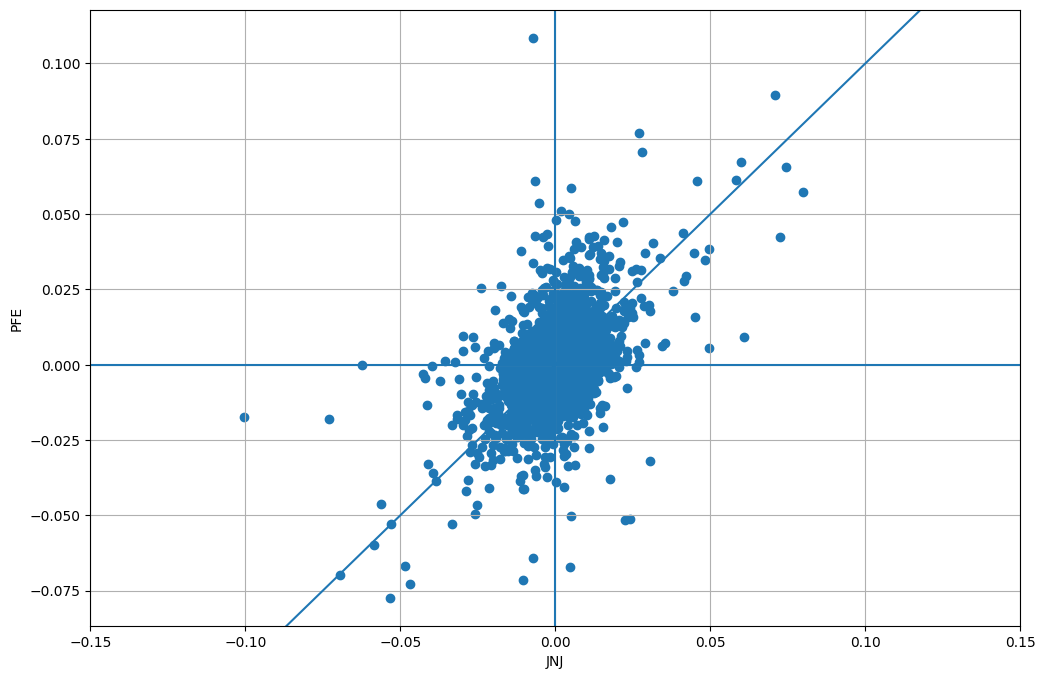

In [41]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'JNJ', 'PFE', xlim=limits)
plt.grid()

#### Matrice di scatter plot

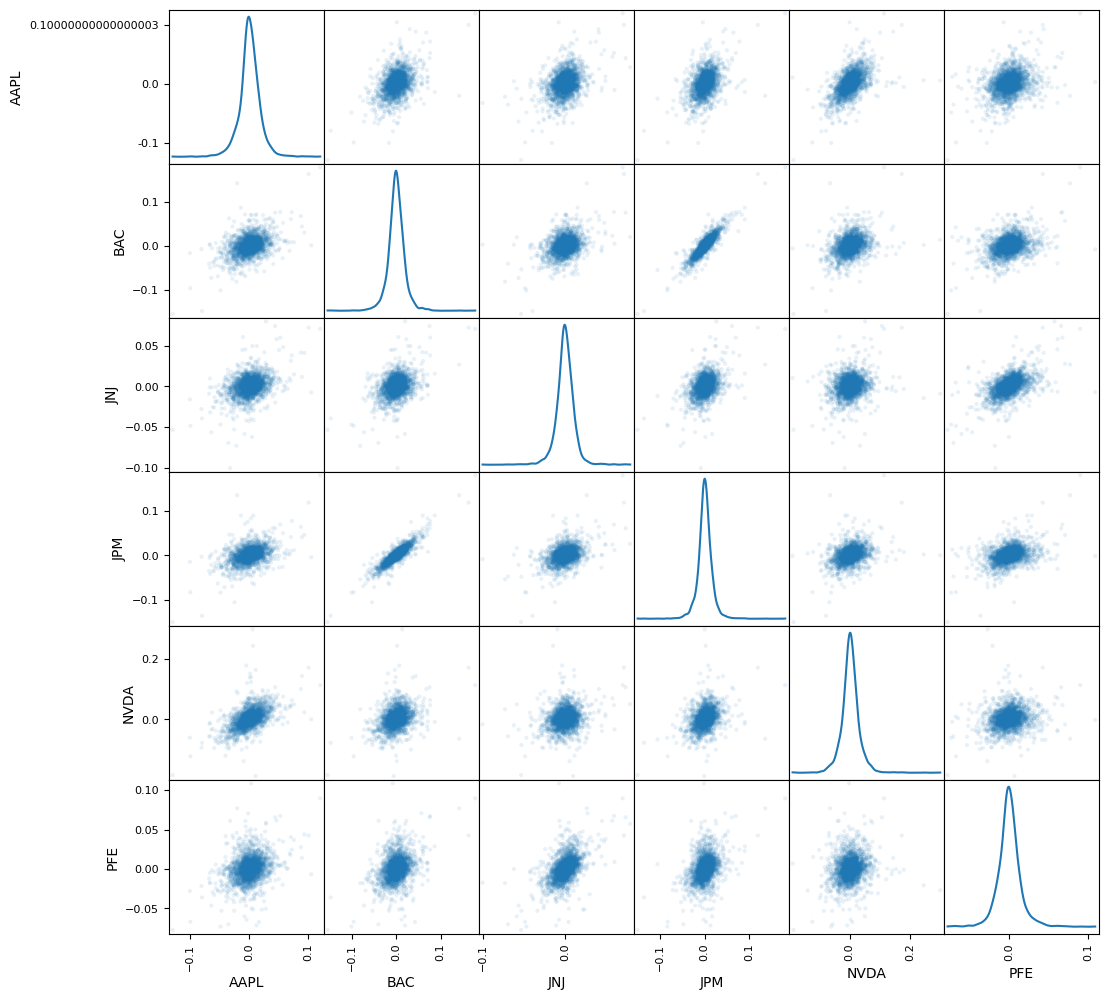

In [42]:
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))

## Analisi di Previsione

### Split data function

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def split_data(df, train_months=80, validation_months=30, test_months=10):
    total_months = train_months + validation_months + test_months
    days_in_month = round(len(df) / total_months)

    train_days = train_months * days_in_month
    validation_days = validation_months * days_in_month

    train_df = df.iloc[:train_days]
    validation_df = df.iloc[train_days:train_days + validation_days]
    test_df = df.iloc[train_days + validation_days:]

    return train_df, validation_df, test_df

In [45]:
# Suddivisione dei dati
train_df, validation_df, test_df = split_data(daily_close_px)

### SARIMAX grid search function

In [46]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings, os, json
from tqdm import tqdm

warnings.filterwarnings("ignore")

In [47]:
# Funzione per eseguire grid search su parametri SARIMAX
def sarimax_grid_search(train_df, validation_df, ticker, pdq_range=(0, 2), s_range=[4, 6, 12]):
    # Controllo se esiste il file json con i risultati
    if os.path.exists(f"data/SARIMAX_configs/{ticker}_sarimax_config.json"):
        json_dict = json.load(open(f"data/SARIMAX_configs/{ticker}_sarimax_config.json"))
        return (json_dict["order"], json_dict["seasonal_order"], json_dict["mse"])

    p = d = q = range(pdq_range[0], pdq_range[1])
    param_combinations = list(itertools.product(p, d, q))
    best_model, lowest_mse = None, None

    total_iterations = len(param_combinations) * len(list(itertools.product(p, d, q, s_range)))

    with tqdm(total=total_iterations, desc="Grid Search Progress", ncols=100) as pbar:
        for order in param_combinations:
            for seasonal_order in itertools.product(p, d, q, s_range):
                try:
                    model = SARIMAX(train_df, order=order, seasonal_order=seasonal_order,
                                    enforce_stationarity=False, enforce_invertibility=False)
                    model_result = model.fit(disp=False) # maxiter=200
                    forecast = model_result.forecast(steps=len(validation_df))
                    mse = mean_squared_error(validation_df, forecast)
                    
                    if not lowest_mse or mse < lowest_mse:
                        lowest_mse = mse
                        best_model = (order, seasonal_order, mse)
                except Exception as ex:
                    continue
                pbar.update(1)

    # Creo la cartella se non esiste
    if not os.path.exists("data/SARIMAX_configs"):
        os.makedirs("data/SARIMAX_configs")
    # Salvo i risultati su file json
    json.dump({
        "order": best_model[0],
        "seasonal_order": best_model[1],
        "mse": best_model[2]
    }, open(f"data/SARIMAX_configs/{ticker}_sarimax_config.json", "w"))

    return best_model

### Cerco la miglior configurazione per ogni asset

In [48]:
# find the best model for each stock
best_models = {}
for ticker in daily_close_px.columns:
    print(f"\nGrid search for {ticker}...")
    order, seasonal_order, mse = sarimax_grid_search(train_df[ticker], validation_df[ticker], ticker)
    best_models[ticker] = {
        "order": order,
        "seasonal_order": seasonal_order,
        "mse": mse
    }
    print('SARIMAX {}x{}'.format(order, seasonal_order))
    print('Lowest RMSE: %.3f'%np.sqrt(mse))


Grid search for AAPL...
SARIMAX [0, 0, 0]x[1, 1, 0, 6]
Lowest RMSE: 23.810

Grid search for BAC...
SARIMAX [0, 0, 1]x[1, 0, 1, 12]
Lowest RMSE: 7.152

Grid search for JNJ...
SARIMAX [1, 0, 1]x[1, 1, 1, 4]
Lowest RMSE: 8.031

Grid search for JPM...
SARIMAX [0, 0, 1]x[1, 0, 1, 4]
Lowest RMSE: 18.352

Grid search for NVDA...
SARIMAX [1, 0, 0]x[0, 0, 1, 12]
Lowest RMSE: 7.135

Grid search for PFE...
SARIMAX [0, 0, 1]x[1, 0, 1, 6]
Lowest RMSE: 8.509


### SARIMAX Results

In [49]:
models = {}
for ticker in daily_close_px.columns:
    order = best_models[ticker]['order']
    seasonal_order = best_models[ticker]['seasonal_order']
    model = SARIMAX(np.append(train_df[ticker], validation_df[ticker]),
                    order=order, seasonal_order=seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_result = model.fit(disp=False)
    models[ticker] = model_result

#### AAPL

In [50]:
print(models['AAPL'].summary())

                                SARIMAX Results                                
Dep. Variable:                       y   No. Observations:                 2310
Model:             SARIMAX(1, 1, 0, 6)   Log Likelihood               -6392.338
Date:                 Mon, 08 Jul 2024   AIC                          12788.677
Time:                         12:39:23   BIC                          12800.156
Sample:                              0   HQIC                         12792.862
                                - 2310                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6        0.0171      0.014      1.229      0.219      -0.010       0.044
sigma2        15.2643      0.264     57.827      0.000      14.747      15.782
Ljung-Box (L1) (Q):                1465.39  

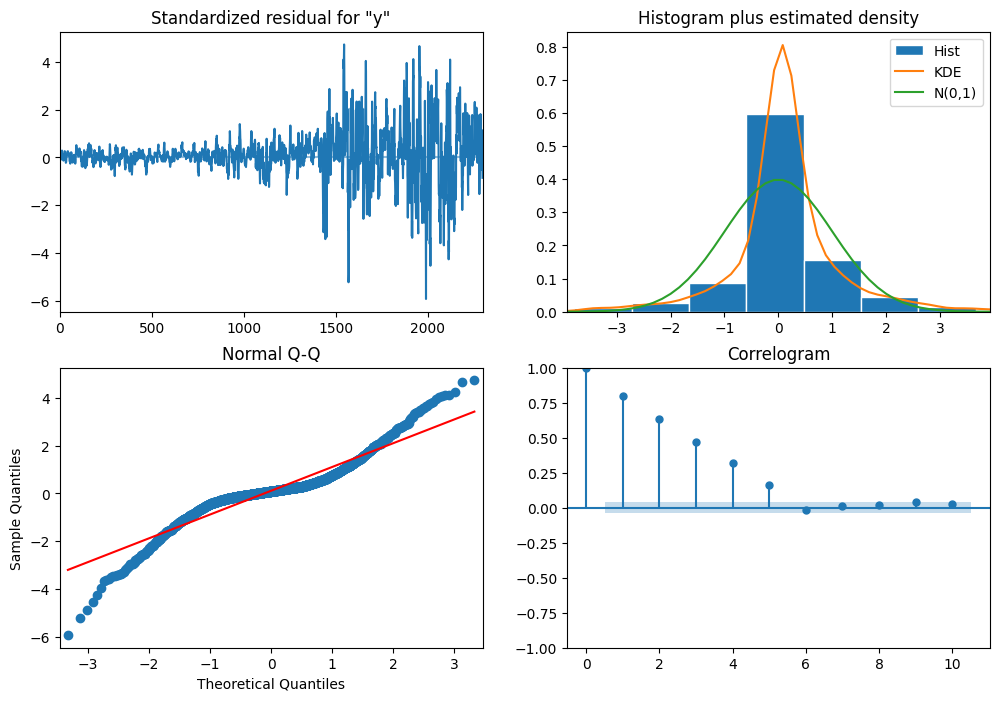

In [51]:
models['AAPL'].plot_diagnostics(figsize=(12,8));

#### NVDA

In [52]:
print(models['NVDA'].summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2310
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood               -1339.505
Date:                              Mon, 08 Jul 2024   AIC                           2685.009
Time:                                      12:39:23   BIC                           2702.227
Sample:                                           0   HQIC                          2691.287
                                             - 2310                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0019      0.000   2588.342      0.000       1.001       1.003
ma.S.L12      26.23

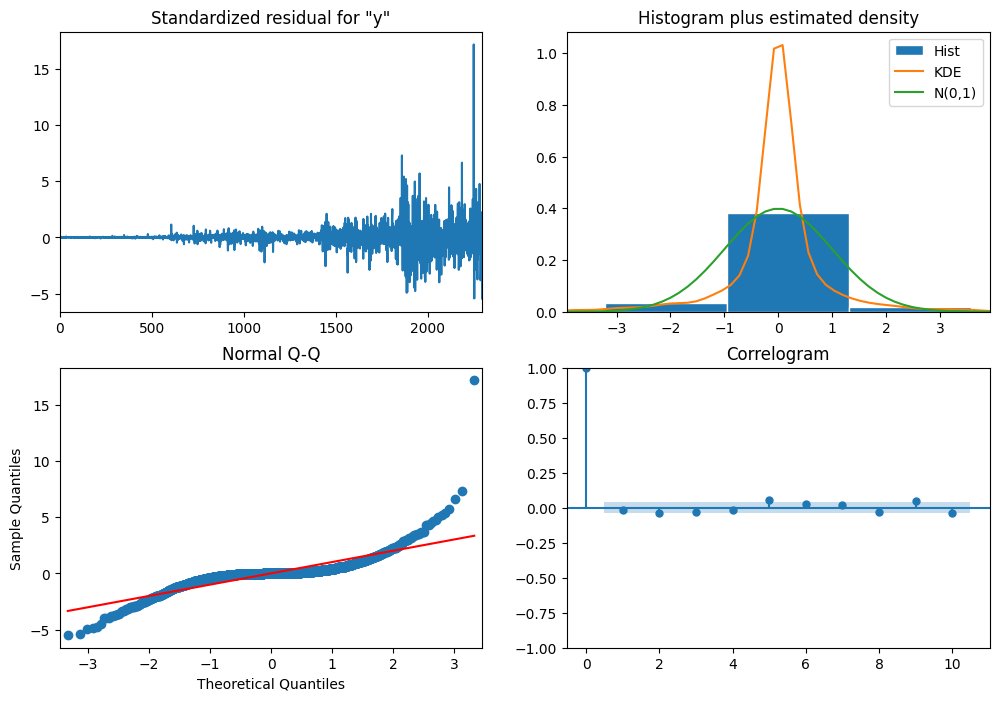

In [53]:
models['NVDA'].plot_diagnostics(figsize=(12,8));

#### JPM

In [54]:
print(models['JPM'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -5303.672
Date:                           Mon, 08 Jul 2024   AIC                          10615.344
Time:                                   12:39:24   BIC                          10638.314
Sample:                                        0   HQIC                         10623.718
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2690      0.010    127.112      0.000       1.249       1.289
ar.S.L4        1.0013      0.001   1382.676

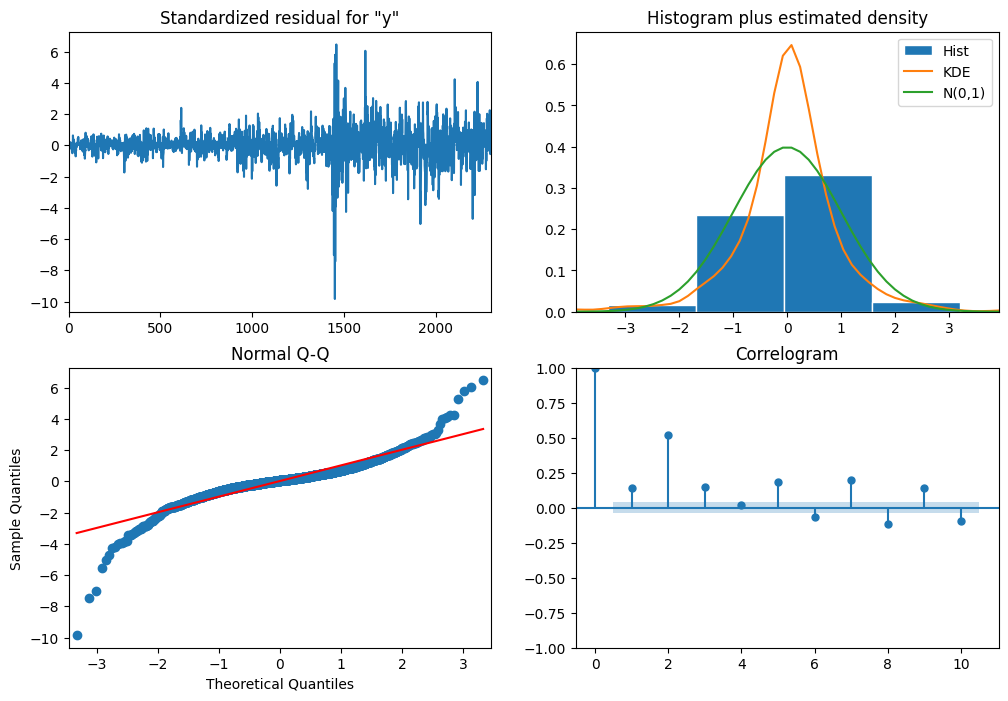

In [55]:
models['JPM'].plot_diagnostics(figsize=(12,8));

#### BAC

In [56]:
print(models['BAC'].summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -3479.204
Date:                            Mon, 08 Jul 2024   AIC                           6966.408
Time:                                    12:39:25   BIC                           6989.364
Sample:                                         0   HQIC                          6974.778
                                           - 2310                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8228      0.008    101.430      0.000       0.807       0.839
ar.S.L12       1.0009      0.001   

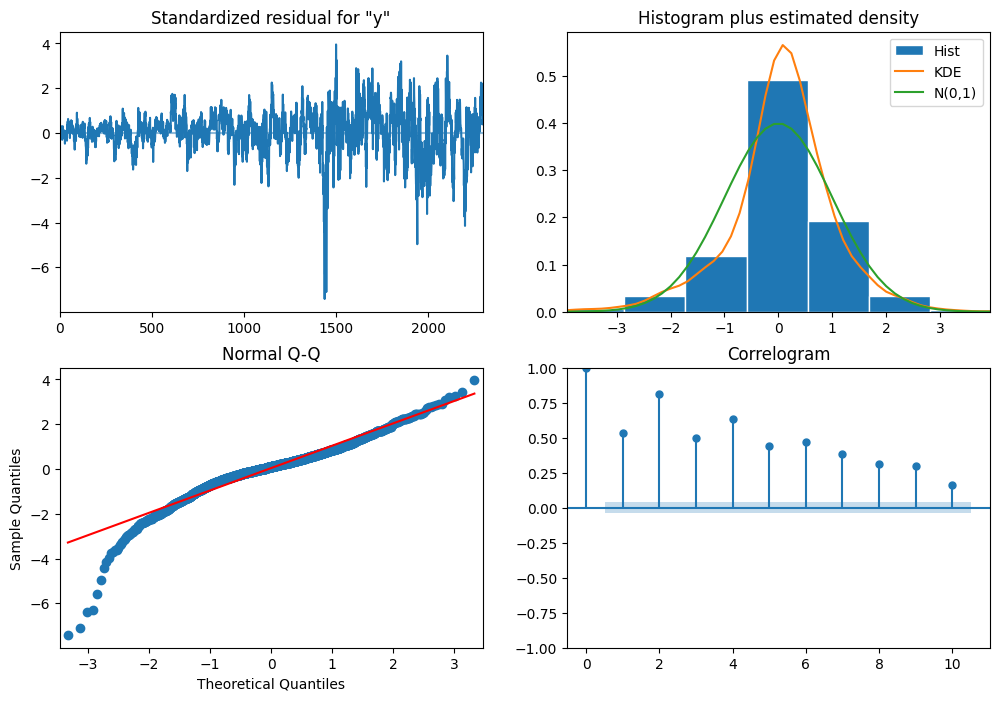

In [57]:
models['BAC'].plot_diagnostics(figsize=(12,8));

#### JNJ

In [58]:
print(models['JNJ'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 4)   Log Likelihood               -4053.480
Date:                           Mon, 08 Jul 2024   AIC                           8116.960
Time:                                   12:39:25   BIC                           8145.664
Sample:                                        0   HQIC                          8127.425
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.001   1054.482      0.000       0.997       1.001
ma.L1         -0.0753      0.011     -6.860

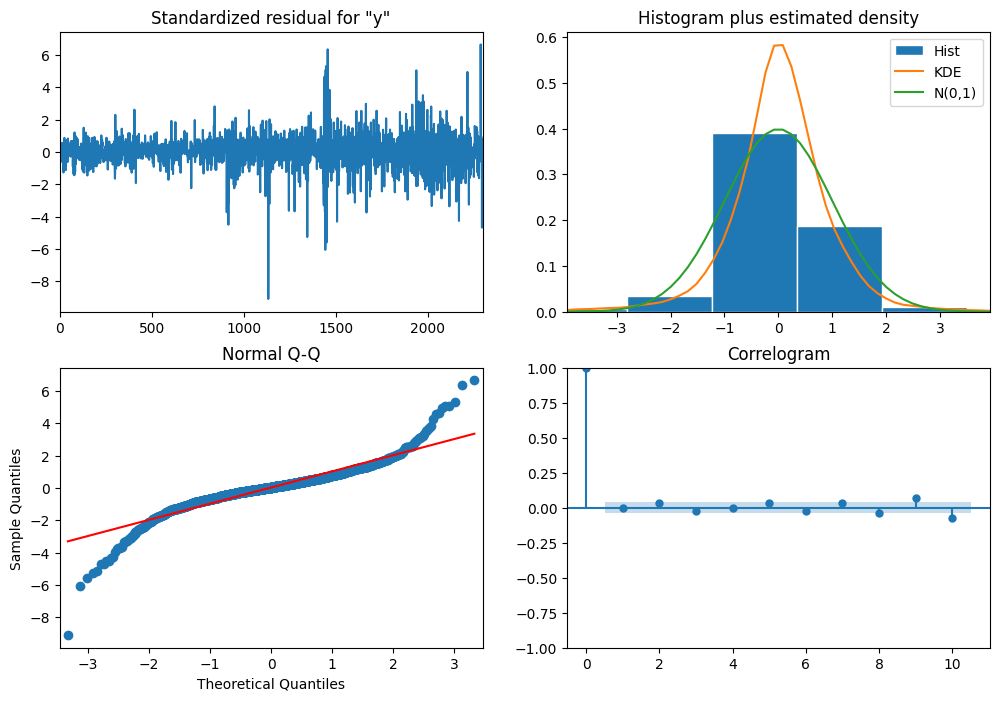

In [59]:
models['JNJ'].plot_diagnostics(figsize=(12,8));

#### PFE

In [60]:
print(models['PFE'].summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2310
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 6)   Log Likelihood               -2830.613
Date:                           Mon, 08 Jul 2024   AIC                           5669.227
Time:                                   12:39:26   BIC                           5692.193
Sample:                                        0   HQIC                          5677.599
                                          - 2310                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8733      0.006    143.148      0.000       0.861       0.885
ar.S.L6        1.0002      0.001   1378.942

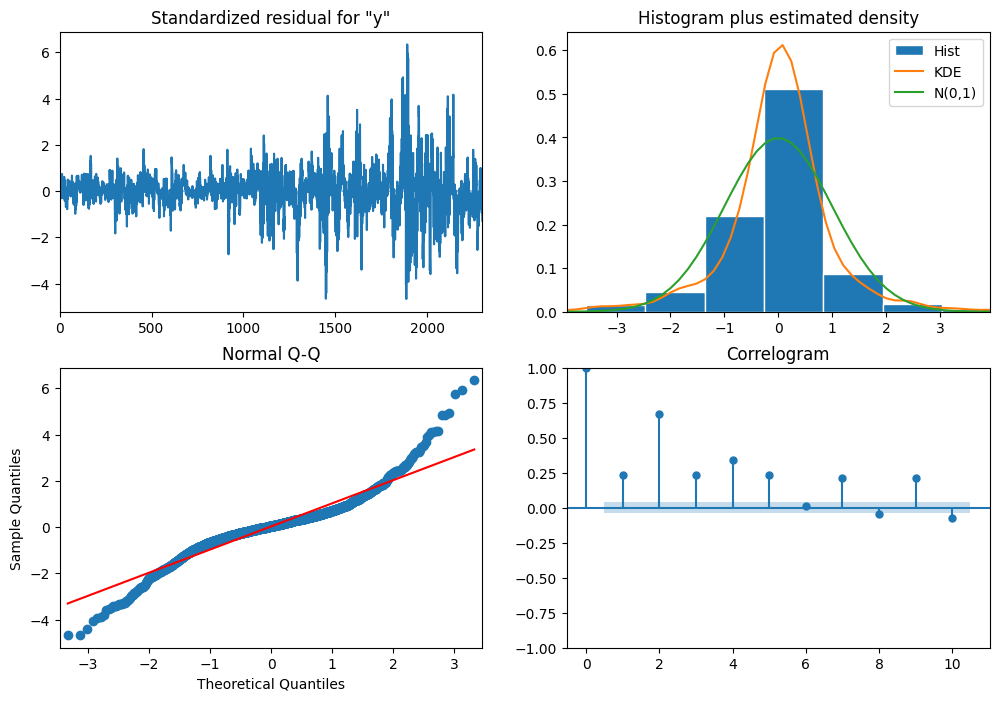

In [61]:
models['PFE'].plot_diagnostics(figsize=(12,8));

### Previsioni con SARIMAX

In [62]:
if os.path.exists(f"data/SARIMAX_configs/SARIMAX_predictions.json"):
    models_predictions = json.load(open(f"data/SARIMAX_configs/SARIMAX_predictions.json"))
else:
    models_predictions = {
        'AAPL': [],
        'NVDA': [],
        'JPM': [],
        'BAC': [],
        'JNJ': [],
        'PFE': []
    }

    total_iterations = len(test_df) * len(daily_close_px.columns)

    with tqdm(total=total_iterations, desc="Forecast Progress", ncols=100) as pbar:
        for ticker in daily_close_px.columns:
            model_fit = models[ticker]
            train_validation_df = np.append(train_df[ticker], validation_df[ticker])

            for i in range(len(test_df[ticker])):
                forecast = model_fit.forecast(steps=1)
                models_predictions[ticker].append(forecast[0])

                train_validation_df = np.append(train_validation_df, test_df[ticker].iloc[i])
                model = SARIMAX(train_validation_df, order=best_models[ticker]['order'],
                                seasonal_order=best_models[ticker]['seasonal_order'],
                                enforce_stationarity=False, enforce_invertibility=False)
                
                model_fit = model.fit(disp=False)

                pbar.update(1)

    json.dump(models_predictions, open(f"data/SARIMAX_configs/SARIMAX_predictions.json", "w"))

#### AAPL

In [63]:
mse = mean_squared_error(test_df['AAPL'], models_predictions['AAPL'])
print(f"AAPL MSE: {mse}")
print(f"AAPL RMSE: {np.sqrt(mse)}")

AAPL MSE: 42.939188111386535
AAPL RMSE: 6.552800020707677


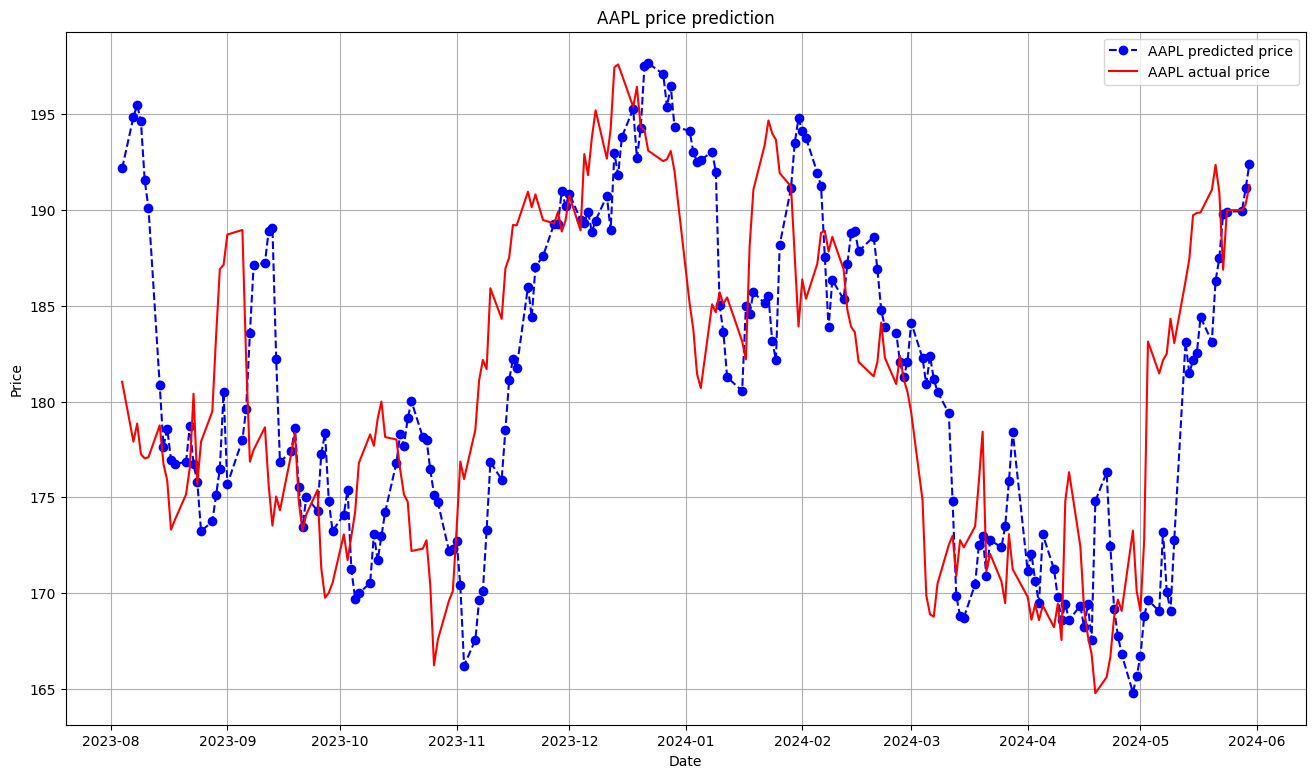

In [64]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['AAPL'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'AAPL predicted price' )
plt.plot(date_range, list(test_df['AAPL']), color = 'red', label = 'AAPL actual price' )
plt.title('AAPL price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### NVDA

In [65]:
mse = mean_squared_error(test_df['NVDA'], models_predictions['NVDA'])
print(f"NVDA MSE: {mse}")
print(f"NVDA RMSE: {np.sqrt(mse)}")

NVDA MSE: 4.202460673234196
NVDA RMSE: 2.049990408083461


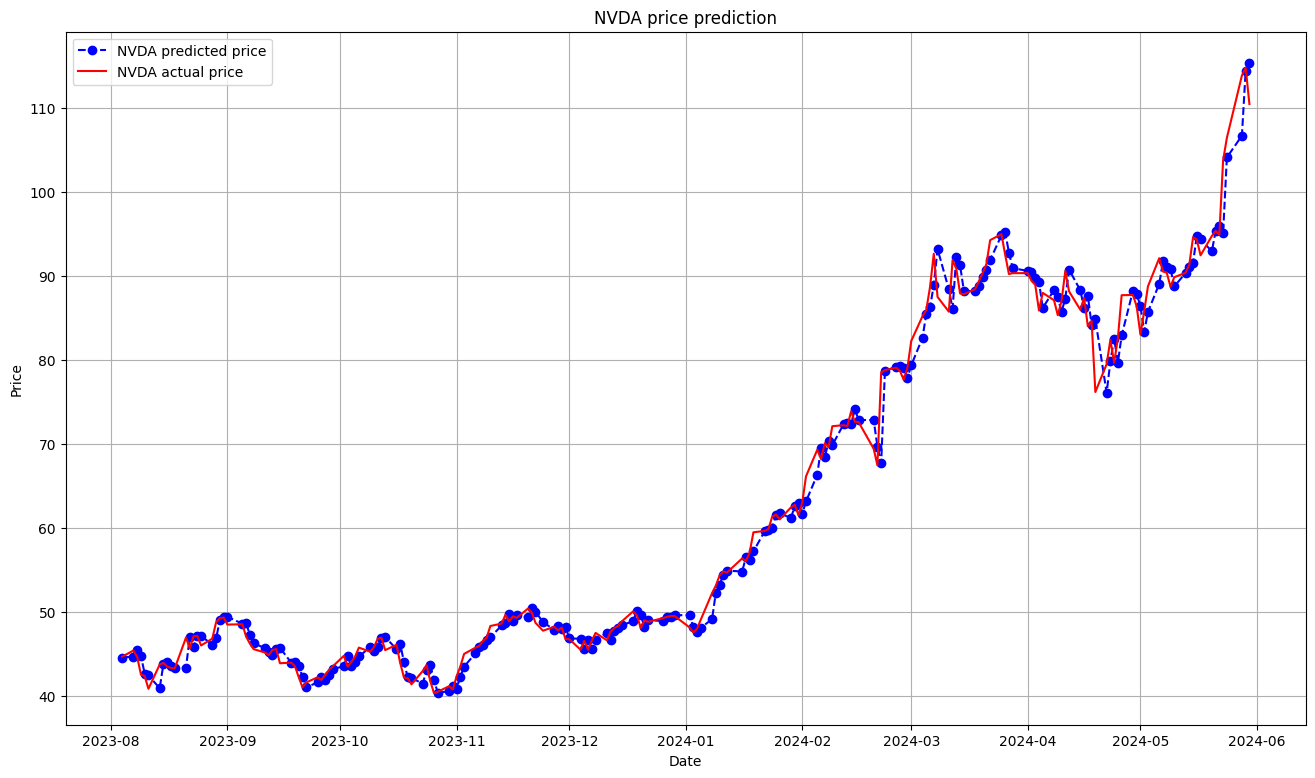

In [66]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['NVDA'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'NVDA predicted price' )
plt.plot(date_range, list(test_df['NVDA']), color = 'red', label = 'NVDA actual price' )
plt.title('NVDA price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### JPM

In [67]:
mse = mean_squared_error(test_df['JPM'], models_predictions['JPM'])
print(f"JPM MSE: {mse}")
print(f"JPM RMSE: {np.sqrt(mse)}")

JPM MSE: 9.886352880485349
JPM RMSE: 3.1442571269674096


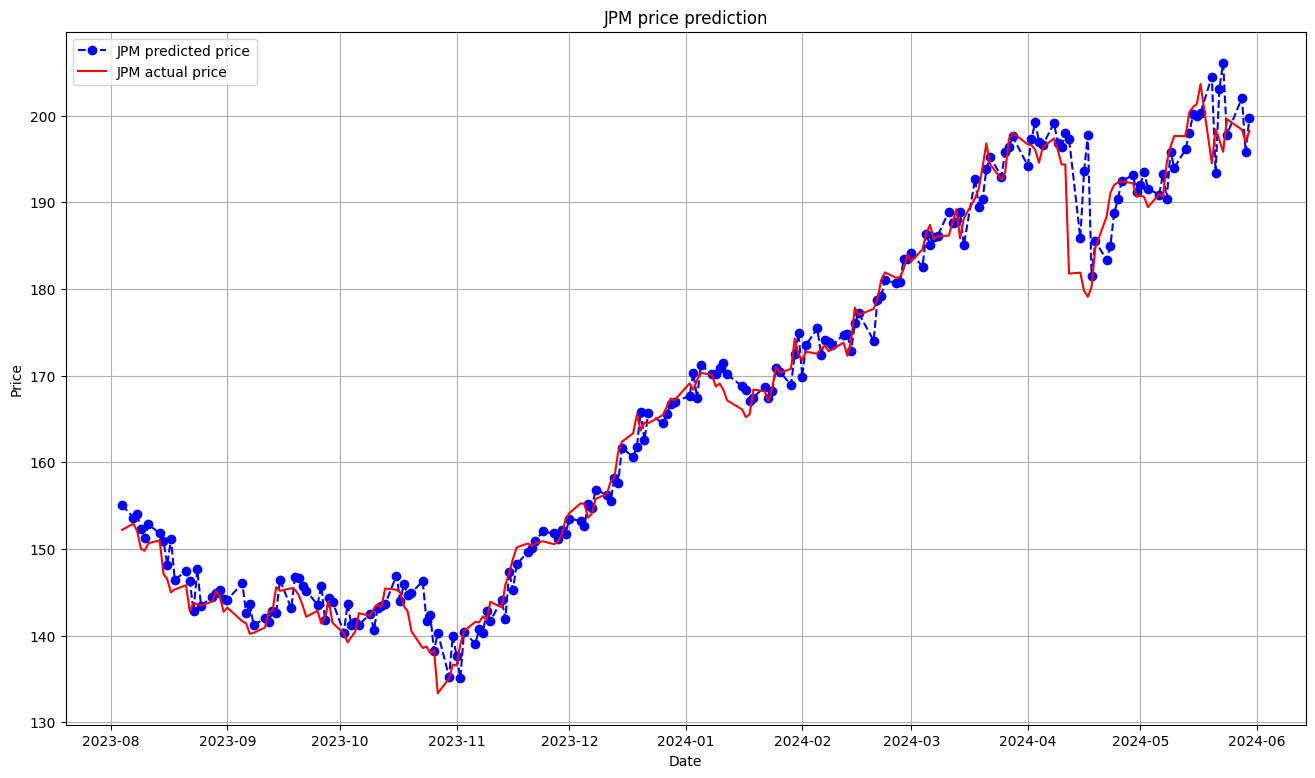

In [68]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['JPM'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'JPM predicted price' )
plt.plot(date_range, list(test_df['JPM']), color = 'red', label = 'JPM actual price' )
plt.title('JPM price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### BAC

In [69]:
mse = mean_squared_error(test_df['BAC'], models_predictions['BAC'])
print(f"BAC MSE: {mse}")
print(f"BAC RMSE: {np.sqrt(mse)}")

BAC MSE: 1.0922543744545194
BAC RMSE: 1.0451097427804026


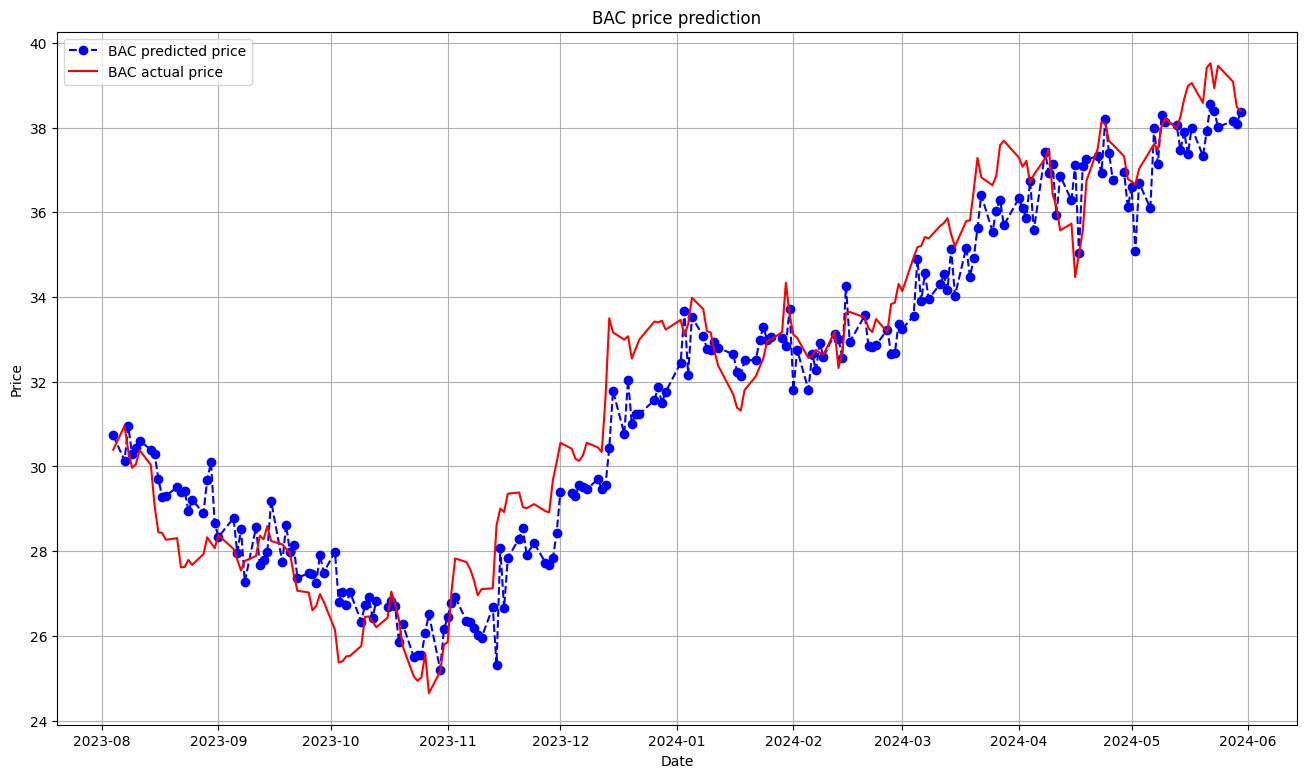

In [70]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['BAC'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BAC predicted price' )
plt.plot(date_range, list(test_df['BAC']), color = 'red', label = 'BAC actual price' )
plt.title('BAC price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### JNJ

In [71]:
mse = mean_squared_error(test_df['JNJ'], models_predictions['JNJ'])
print(f"JNJ MSE: {mse}")
print(f"JNJ RMSE: {np.sqrt(mse)}")

JNJ MSE: 2.1597666387962797
JNJ RMSE: 1.4696144524317525


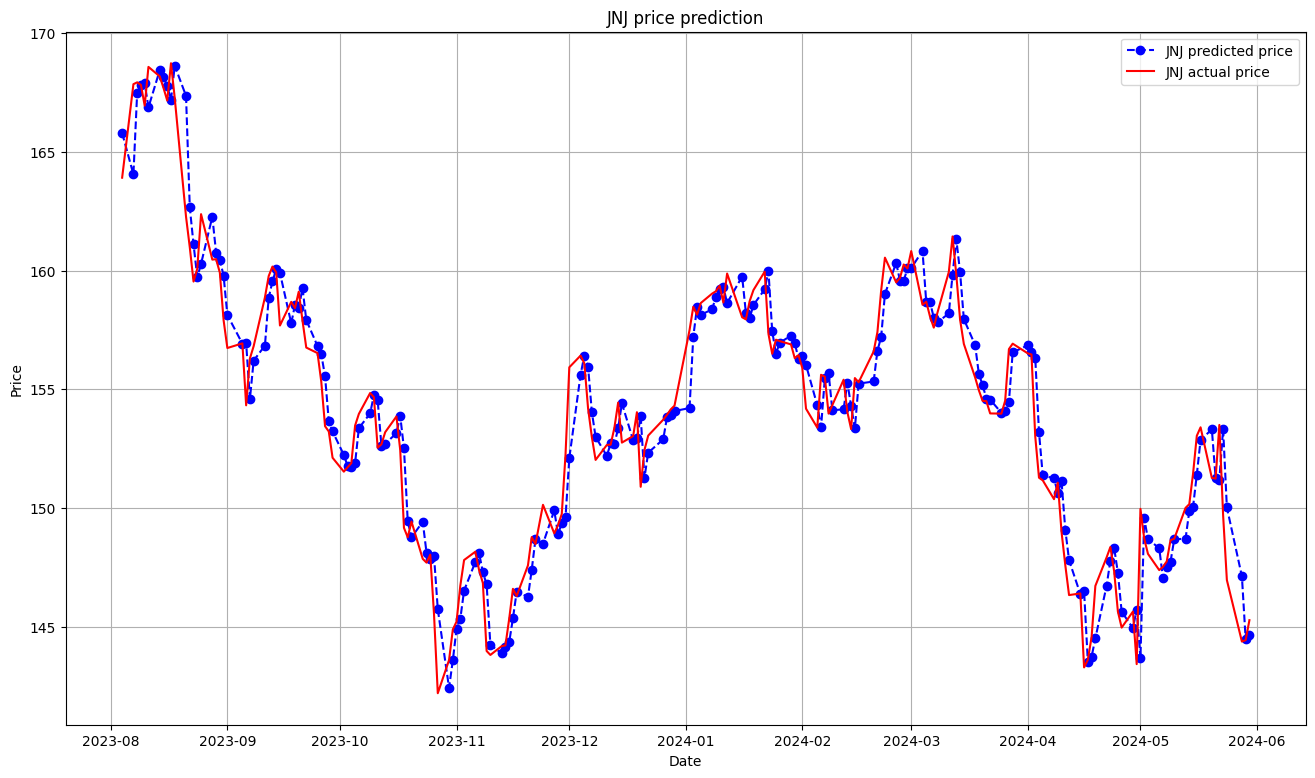

In [72]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['JNJ'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'JNJ predicted price' )
plt.plot(date_range, list(test_df['JNJ']), color = 'red', label = 'JNJ actual price' )
plt.title('JNJ price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### PFE

In [73]:
mse = mean_squared_error(test_df['PFE'], models_predictions['PFE'])
print(f"PFE MSE: {mse}")
print(f"PFE RMSE: {np.sqrt(mse)}")

PFE MSE: 0.6927332208141695
PFE RMSE: 0.8323059658648192


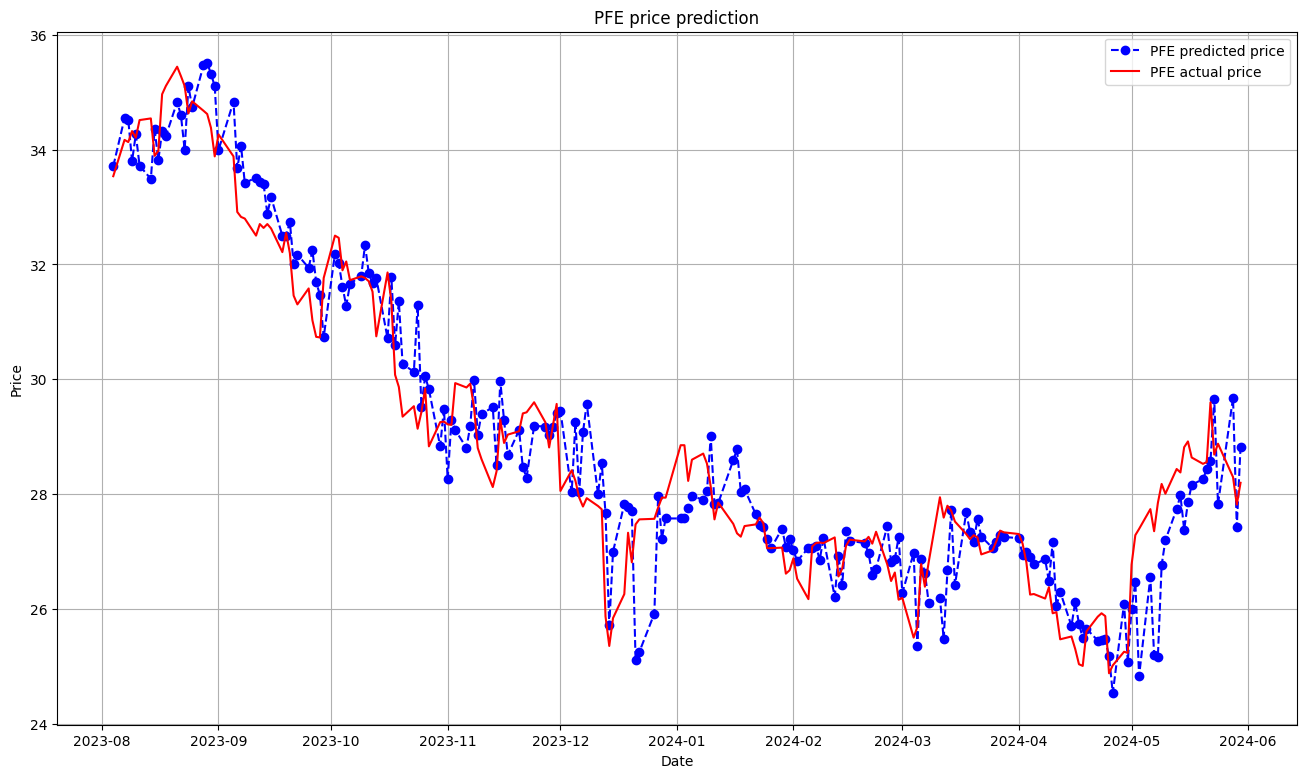

In [74]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = test_df.index
plt.plot(date_range, models_predictions['PFE'], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'PFE predicted price' )
plt.plot(date_range, list(test_df['PFE']), color = 'red', label = 'PFE actual price' )
plt.title('PFE price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Strategie di trading e backtesting

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm

In [76]:
# Caricamento dei dati
symbol = 'NVDA'
data = pd.DataFrame()
data[symbol] = daily_close_px[symbol]

In [77]:
# Suddivisione dei dati in training (80%) e test (20%)
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_data = data[:split_index].copy()
test_data = data[split_index:].copy()

In [78]:
# Funzione di backtesting con parametri SMA
def backtest_strategy(data, SMA1, SMA2):
    data['SMA1'] = data[symbol].rolling(window=SMA1).mean()
    data['SMA2'] = data[symbol].rolling(window=SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.loc[data['Position'].shift(1) == -1, 'Strategy'] = 0  # Zero returns when position is -1
    data.dropna(inplace=True)
    return np.exp(data['Strategy'].sum())

In [79]:
# Definire il range dei parametri per il tuning
SMA1 = range(20, 61, 2)
SMA2 = range(180, 281, 2)

In [80]:
best_performance = -np.inf
best_params = None

total_iterations = len(SMA1) * len(SMA2)

# Effettuare la grid search sui dati di training
with tqdm(total=total_iterations, desc="Grid Search Progress", ncols=100) as pbar:
    for SMA1, SMA2 in product(SMA1, SMA2):
        performance = backtest_strategy(train_data.copy(), SMA1, SMA2)
        if performance > best_performance:
            best_performance = performance
            best_params = {'SMA1': SMA1, 'SMA2': SMA2}
        pbar.update(1)

print("Best Performance on Training Data:", best_performance)
print("Best Parameters:", best_params)

Grid Search Progress: 100%|████████████████████████████████████| 1071/1071 [00:04<00:00, 263.97it/s]

Best Performance on Training Data: 54.55989854100286
Best Parameters: {'SMA1': 52, 'SMA2': 182}


In [81]:
# Valutare la strategia sui dati di test con i migliori parametri trovati
test_performance = backtest_strategy(test_data.copy(), best_params['SMA1'], best_params['SMA2'])
print("Performance on Test Data:", test_performance)

Performance on Test Data: 5.02473453177747


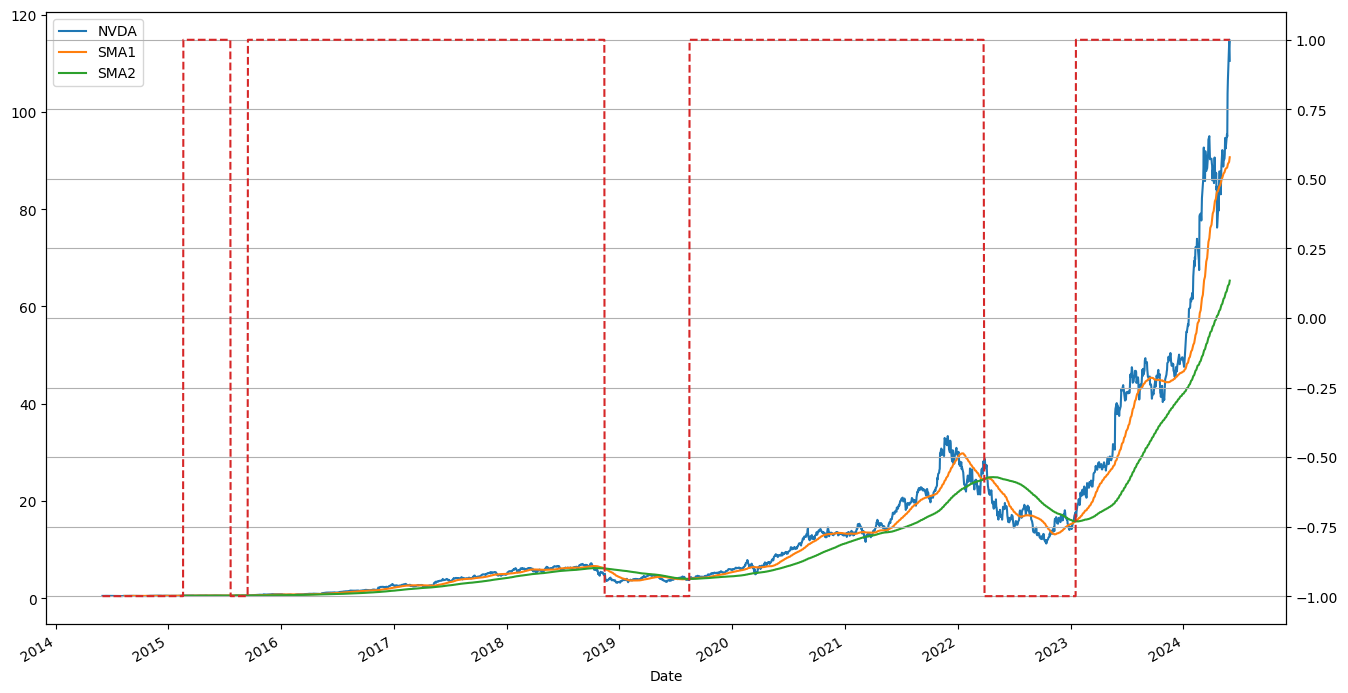

In [82]:
# Visualizzazione dei risultati sul'intero dataset
data['SMA1'] = data[symbol].rolling(window=best_params['SMA1']).mean()
data['SMA2'] = data[symbol].rolling(window=best_params['SMA2']).mean()
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

data[[symbol, 'SMA1', 'SMA2']].plot(figsize=(16,9))
data['Position'].plot(secondary_y='Position', style='--')
plt.grid()

In [83]:
# Calcolo la strategia su tutto il dataset
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.loc[data['Position'].shift(1) == -1, 'Strategy'] = 0  # Zero returns when position is -1
data.dropna(inplace=True)

In [84]:
# Calcolo delle metriche di performance
performance_metrics = {
    'Cumulative_Returns_Buy_and_Hold': np.exp(data['Returns'].sum()),
    'Cumulative_Returns_Strategy': np.exp(data['Strategy'].sum()),
    'Annualized_Returns_Buy_and_Hold': np.exp(data['Returns'].mean() * 252),
    'Annualized_Returns_Strategy': np.exp(data['Strategy'].mean() * 252),
    'Volatility_Buy_and_Hold': data['Returns'].std() * np.sqrt(252),
    'Volatility_Strategy': data['Strategy'].std() * np.sqrt(252)
}

for key, value in performance_metrics.items():
    print(f"{key}: {value}")

Cumulative_Returns_Buy_and_Hold: 208.08551831559484
Cumulative_Returns_Strategy: 347.11548922349306
Annualized_Returns_Buy_and_Hold: 1.7786246620974997
Annualized_Returns_Strategy: 1.8795677390550922
Volatility_Buy_and_Hold: 0.4812942234710853
Volatility_Strategy: 0.4138333025816099


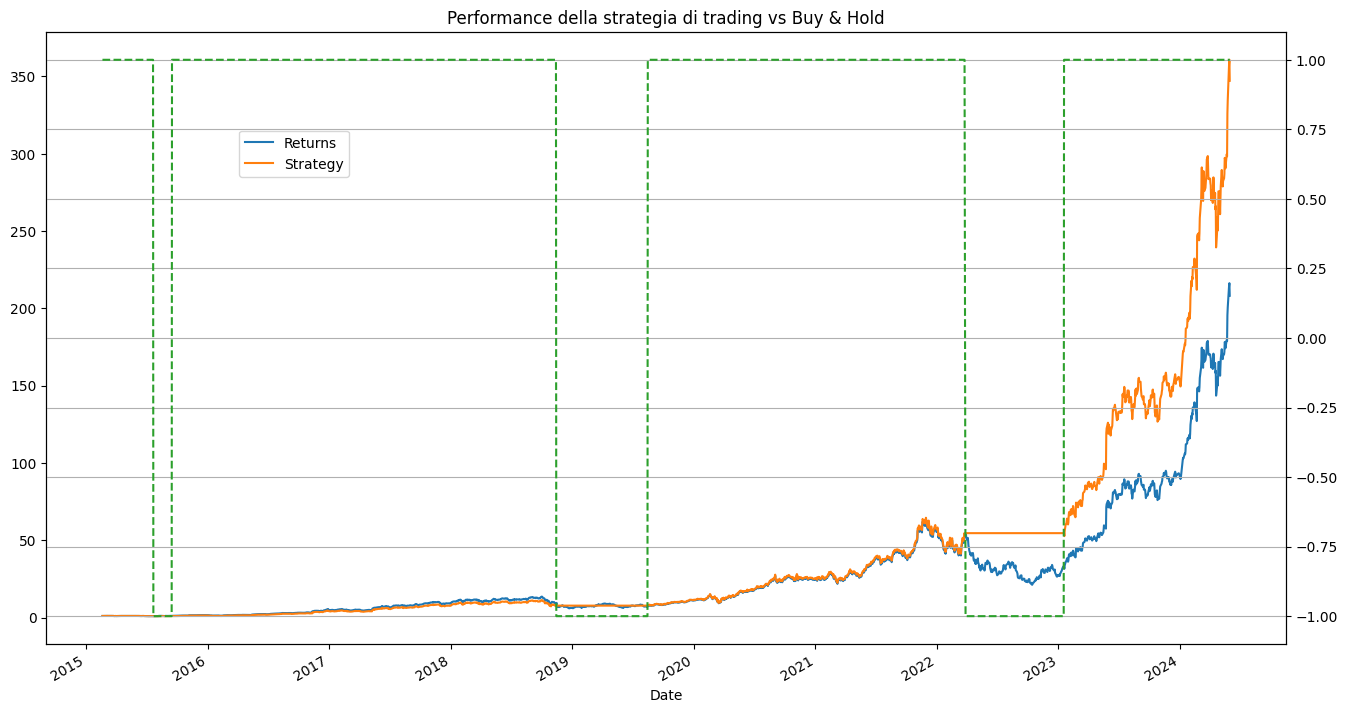

In [85]:
# Visualizzazione dei risultati
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(16,9))
data['Position'].plot(ax=ax, secondary_y='Position', style = '--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
plt.grid()
plt.title('Performance della strategia di trading vs Buy & Hold')
plt.show()

## CAPM

### Calcolo del Beta per ciascun titolo rispetto a S&P500

In [86]:
import pandas as pd
import yfinance as yf
import numpy as np

In [87]:
# Scarico i dati storici per l'indice S&P 500
sp500 = yf.download('^GSPC', start=START_DATE, end=END_DATE)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [88]:
# Calcolo i rendimenti giornalieri dell'S&P 500
sp500_returns = sp500.pct_change().dropna()

In [89]:
# Calcolo i rendimenti giornalieri per ciascun titolo
returns = daily_close_px.pct_change().dropna()
returns.head()

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014142,-0.003276,0.002838,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001438,0.001061,0.001690
2014-06-05,0.003923,0.014464,0.005259,0.017062,0.004237,0.004049
2014-06-06,-0.002750,0.010370,-0.000387,0.006004,0.003692,-0.011425
2014-06-09,0.016001,0.016036,0.000388,0.007899,0.001051,-0.002379


In [90]:
# DataFrame per memorizzare i beta di ciascun titolo
betas = pd.DataFrame(columns=['Beta'])

In [91]:
# Calcola il beta per ciascun titolo
for ticker in returns.columns:
    # Calcola la covarianza tra i rendimenti del titolo e quelli del mercato
    covariance = np.cov(returns[ticker], sp500_returns)[0, 1]
    # Calcola la varianza dei rendimenti del mercato
    market_variance = sp500_returns.var()
    # Calcola il beta
    beta = covariance / market_variance
    # Aggiungi il beta al DataFrame
    betas.loc[ticker] = beta

betas

,Beta
AAPL,1.197246
BAC,1.240393
JNJ,0.573976
JPM,1.116090
NVDA,1.693038
PFE,0.631233


### Rendimento atteso annuo per ogni titolo

In [120]:
# Scarico i dati del T-Bill a 1 anno
risk_free_ticker = '^IRX'
risk_free_data = yf.download(risk_free_ticker, start=START_DATE, end=END_DATE)

risk_free_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,0.030,0.030,0.025,0.025,0.025,0
2014-06-03,0.030,0.030,0.030,0.030,0.030,0
2014-06-04,0.030,0.030,0.028,0.030,0.030,0
2014-06-05,0.030,0.030,0.028,0.030,0.030,0
2014-06-06,0.030,0.030,0.028,0.028,0.028,0
...,...,...,...,...,...,...
2024-05-23,5.240,5.248,5.238,5.245,5.245,0
2024-05-24,5.245,5.248,5.245,5.245,5.245,0
2024-05-28,5.248,5.250,5.248,5.248,5.248,0


In [121]:
# Calcolo il tasso privo di rischio annuale come l'ultimo valore disponibile
risk_free_rate = risk_free_data['Adj Close'].iloc[-1] / 100
risk_free_rate

np.float64(0.05248000144958496)

In [122]:
# Calcolo il rendimento annualizzato dell'S&P 500 (stima del mercato)
annualized_sp500_return = ((1 + sp500_returns.mean()) ** 252) - 1
annualized_sp500_return

np.float64(0.12299429408195972)

In [123]:
# Calcolo il rendimento atteso annuo per ciascun titolo utilizzando il CAPM
expected_returns = pd.DataFrame(columns=['Expected Return'])

for ticker in betas.index:
    beta = betas.loc[ticker, 'Beta']
    expected_return = risk_free_rate + beta * (annualized_sp500_return - risk_free_rate)
    expected_returns.loc[ticker] = expected_return

expected_returns

,Expected Return
AAPL,0.136903
BAC,0.139945
JNJ,0.092953
JPM,0.131180
NVDA,0.171863
PFE,0.096991


### Esposizione di ciascun titolo ai fattori di rischio Fama-French

In [166]:
import statsmodels.formula.api as smf
import requests, zipfile
import pandas as pd
import os

In [167]:
# Funzione per scaricare i dati Fama-French
def download_ff_factors():
    zip_file_path = "data/FF_factors/F-F_Research_Data_Factors_daily_CSV.zip"

    if not os.path.exists("data/FF_factors"):
        os.makedirs("data/FF_factors")
    if not os.path.exists(zip_file_path):
        url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip"
        response = requests.get(url)

        with open(zip_file_path, "wb") as file:
            file.write(response.content)

    csv_file_path = "data/FF_factors/F-F_Research_Data_Factors_daily.CSV"
    if not os.path.exists(csv_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall("data/FF_factors")

    ff_factors = pd.read_csv(csv_file_path, skiprows=3)
    ff_factors.columns = ["Date", "Mkt-RF", "SMB", "HML", "RF"]
    ff_factors = ff_factors[:-1]  # Remove last row (footer)
    ff_factors["Date"] = pd.to_datetime(ff_factors["Date"], format="%Y%m%d")
    ff_factors.set_index("Date", inplace=True)
    ff_factors = ff_factors / 100  # Convert percentages to decimals
    return ff_factors

In [170]:
# Scarico i dati dei fattori di rischio Fama-French
ff_factors = download_ff_factors()

In [171]:
# Calcolo i rendimenti giornalieri per ciascun titolo
returns = daily_close_px.pct_change().dropna()
returns

Ticker,AAPL,BAC,JNJ,JPM,NVDA,PFE
Date,,,,,,
2014-06-03,0.014142,-0.003276,0.002838,0.004517,-0.004224,-0.004039
2014-06-04,0.011419,0.000000,0.002147,0.001438,0.001061,0.001690
2014-06-05,0.003923,0.014464,0.005259,0.017062,0.004237,0.004049
2014-06-06,-0.002750,0.010370,-0.000387,0.006004,0.003692,-0.011425
2014-06-09,0.016001,0.016036,0.000388,0.007899,0.001051,-0.002379
...,...,...,...,...,...,...
2024-05-23,-0.021058,-0.014839,-0.024756,-0.007009,0.093197,-0.030743
2024-05-24,0.016588,0.013531,-0.018236,0.019246,0.025723,0.006622
2024-05-28,0.000053,-0.009572,-0.017623,-0.006029,0.069804,-0.020083


In [172]:
# Filtro i dati Fama-French per includere solo il periodo rilevante
ff_factors = ff_factors.loc[returns.index.min():returns.index.max()]
ff_factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-06-03,-0.0005,-0.0026,0.0016,0.0000
2014-06-04,0.0028,0.0023,-0.0008,0.0000
2014-06-05,0.0077,0.0129,-0.0017,0.0000
2014-06-06,0.0054,0.0048,-0.0001,0.0000
2014-06-09,0.0022,0.0102,-0.0031,0.0000
...,...,...,...,...
2024-05-23,-0.0085,-0.0059,-0.0064,0.0002
2024-05-24,0.0072,0.0003,0.0016,0.0002
2024-05-28,-0.0004,0.0028,-0.0090,0.0002


In [173]:
# Inizializzo un DataFrame per memorizzare i coefficienti di regressione di ciascun titolo
ff_exposures = pd.DataFrame(index=returns.columns, columns=['Alpha', 'Market', 'SMB', 'HML'])

In [174]:
ff_models = {}
# Eseguo la regressione multipla per ciascun titolo
for ticker in returns.columns:
    # Preparazione dei dati per la regressione
    ff_data = pd.DataFrame({
        'excess_rtn': returns[ticker] - ff_factors['RF'],
        'mkt': ff_factors['Mkt-RF'],
        'smb': ff_factors['SMB'],
        'hml': ff_factors['HML']
    }).dropna()
    
    # Esecuzione della regressione usando la formula
    ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml', data=ff_data).fit()
    
    # Memorizzazione dei risultati nel DataFrame
    ff_exposures.loc[ticker, 'Alpha'] = ff_model.params['Intercept']
    ff_exposures.loc[ticker, 'Market'] = ff_model.params['mkt']
    ff_exposures.loc[ticker, 'SMB'] = ff_model.params['smb']
    ff_exposures.loc[ticker, 'HML'] = ff_model.params['hml']

    ff_models[ticker] = ff_model

ff_exposures

,Alpha,Market,SMB,HML
Ticker,,,,
AAPL,0.000394,1.176318,-0.295583,-0.40643
BAC,0.000103,1.259395,0.023981,1.064863
JNJ,-0.000031,0.578906,-0.397614,0.058151
JPM,0.000258,1.13815,-0.146797,0.883513
NVDA,0.001717,1.638014,0.064011,-0.905945
PFE,-0.000107,0.630702,-0.328106,0.078055


#### AAPL

In [175]:
# Stampa del riepilogo del modello
print('Regression results for AAPL:')
print(ff_models['AAPL'].summary())

Regression results for AAPL:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1283.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:09:10   Log-Likelihood:                 7729.4
No. Observations:                2516   AIC:                        -1.545e+04
Df Residuals:                    2512   BIC:                        -1.543e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004  

#### NVDA

In [176]:
# Stampa del riepilogo del modello
print('Regression results for NVDA:')
print(ff_models['NVDA'].summary())

Regression results for NVDA:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     804.4
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:04   Log-Likelihood:                 6114.9
No. Observations:                2516   AIC:                        -1.222e+04
Df Residuals:                    2512   BIC:                        -1.220e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017  

#### JPM

In [177]:
# Stampa del riepilogo del modello
print('Regression results for JPM:')
print(ff_models['JPM'].summary())

Regression results for JPM:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     2471.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:06   Log-Likelihood:                 8414.8
No. Observations:                2516   AIC:                        -1.682e+04
Df Residuals:                    2512   BIC:                        -1.680e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   

#### BAC

In [178]:
# Stampa del riepilogo del modello
print('Regression results for BAC:')
print(ff_models['BAC'].summary())

Regression results for BAC:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2417.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:08   Log-Likelihood:                 8047.9
No. Observations:                2516   AIC:                        -1.609e+04
Df Residuals:                    2512   BIC:                        -1.606e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   

#### JNJ

In [179]:
# Stampa del riepilogo del modello
print('Regression results for JNJ:')
print(ff_models['JNJ'].summary())

Regression results for JNJ:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     423.8
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          9.77e-223
Time:                        17:11:10   Log-Likelihood:                 8207.8
No. Observations:                2516   AIC:                        -1.641e+04
Df Residuals:                    2512   BIC:                        -1.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.061e-05   

#### PFE

In [180]:
# Stampa del riepilogo del modello
print('Regression results for PFE:')
print(ff_models['PFE'].summary())

Regression results for PFE:
                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     269.2
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          1.71e-151
Time:                        17:11:12   Log-Likelihood:                 7453.3
No. Observations:                2516   AIC:                        -1.490e+04
Df Residuals:                    2512   BIC:                        -1.488e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0001   